PROJETO: 120 anos das olímpíadas
  Por: João Pedro Moreira Alonso
  
Este projeto engloba os dados das olímpiadas realizadas nos últimos 120 anos. 

In [207]:
import pandas as pd
import seaborn as sns
import sklearn
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [208]:
atleta = pd.read_csv(r'C:\Users\joaom\OneDrive\Documentos\Curso\Curso de Data Science\material de apoio\athlete_events.csv', sep=',',encoding='UTF-8')

In [209]:
regiao = pd.read_csv(r'C:\Users\joaom\OneDrive\Documentos\Curso\Curso de Data Science\material de apoio\noc_regions.csv', sep=',',encoding='UTF-8')

In [210]:
atleta.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [211]:
olim = pd.merge(atleta,regiao, on='NOC',how='left')

In [212]:
olim.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [213]:
olim.head(10)['Name']

0                   A Dijiang
1                    A Lamusi
2         Gunnar Nielsen Aaby
3        Edgar Lindenau Aabye
4    Christine Jacoba Aaftink
5    Christine Jacoba Aaftink
6    Christine Jacoba Aaftink
7    Christine Jacoba Aaftink
8    Christine Jacoba Aaftink
9    Christine Jacoba Aaftink
Name: Name, dtype: object

In [214]:
olim.head(10)[['Name']]

,Name
0,A Dijiang
1,A Lamusi
2,Gunnar Nielsen Aaby
3,Edgar Lindenau Aabye
4,Christine Jacoba Aaftink
5,Christine Jacoba Aaftink
6,Christine Jacoba Aaftink
7,Christine Jacoba Aaftink
8,Christine Jacoba Aaftink
9,Christine Jacoba Aaftink


In [215]:
olim.shape

(271116, 17)

In [216]:
olim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  region  270746 non-null  object 
 16  notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [217]:
olim.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region', 'notes'],
      dtype='object')

In [218]:
olim = olim.rename(columns={'Name': 'Nome', 'Sex':'Sexo', 'Age':'Idade', 'Height':'Altura', 'Weight':'Peso', 'Team':'Time', 'NOC': 'Sigla_pais', 'Games':'Jogo','Year':'Ano', 'Season':'Temporada', 'City':'Cidade', 'Sport':'Esporte', 'Event':'Evento', 'Medal':'Medalha', 'region':'Pais', 'notes':'Obs'})

In [219]:
olim.head()

,ID,Nome,Sexo,Idade,Altura,Peso,Time,Sigla_pais,Jogo,Ano,Temporada,Cidade,Esporte,Evento,Medalha,Pais,Obs
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [220]:
olim = olim.rename(columns={'Sigla_pais':'Sigla'})

In [221]:
olim.head()

,ID,Nome,Sexo,Idade,Altura,Peso,Time,Sigla,Jogo,Ano,Temporada,Cidade,Esporte,Evento,Medalha,Pais,Obs
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [222]:
olim.shape

(271116, 17)

In [223]:
olim = olim.drop_duplicates()

In [224]:
olim.shape

(269731, 17)

In [225]:
olim.isnull().all()

ID           False
Nome         False
Sexo         False
Idade        False
Altura       False
Peso         False
Time         False
Sigla        False
Jogo         False
Ano          False
Temporada    False
Cidade       False
Esporte      False
Evento       False
Medalha      False
Pais         False
Obs          False
dtype: bool

In [226]:
olim.isnull().any()

ID           False
Nome         False
Sexo         False
Idade         True
Altura        True
Peso          True
Time         False
Sigla        False
Jogo         False
Ano          False
Temporada    False
Cidade       False
Esporte      False
Evento       False
Medalha       True
Pais          True
Obs           True
dtype: bool

In [227]:
olim[olim['Altura'].isnull()].head()

,ID,Nome,Sexo,Idade,Altura,Peso,Time,Sigla,Jogo,Ano,Temporada,Cidade,Esporte,Evento,Medalha,Pais,Obs
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
29,10,"Einar Ferdinand ""Einari"" Aalto",M,26.0,NaN,NaN,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,NaN,Finland,NaN
35,15,Arvo Ossian Aaltonen,M,22.0,NaN,NaN,Finland,FIN,1912 Summer,1912,Summer,Stockholm,Swimming,Swimming Men's 200 metres Breaststroke,NaN,Finland,NaN
36,15,Arvo Ossian Aaltonen,M,22.0,NaN,NaN,Finland,FIN,1912 Summer,1912,Summer,Stockholm,Swimming,Swimming Men's 400 metres Breaststroke,NaN,Finland,NaN


In [228]:
olim.isnull().sum()

ID                0
Nome              0
Sexo              0
Idade          9315
Altura        58814
Peso          61527
Time              0
Sigla             0
Jogo              0
Ano               0
Temporada         0
Cidade            0
Esporte           0
Evento            0
Medalha      229959
Pais            370
Obs          264696
dtype: int64

In [229]:
olim = olim.dropna(subset=['Peso'])

In [230]:
olim.isnull().sum()

ID                0
Nome              0
Sexo              0
Idade           862
Altura         1364
Peso              0
Time              0
Sigla             0
Jogo              0
Ano               0
Temporada         0
Cidade            0
Esporte           0
Evento            0
Medalha      177748
Pais            277
Obs          204692
dtype: int64

In [231]:
olim = olim.dropna(subset=['Altura'])

In [232]:
olim = olim.dropna(subset=['Idade'])

In [233]:
olim.isnull().sum()

ID                0
Nome              0
Sexo              0
Idade             0
Altura            0
Peso              0
Time              0
Sigla             0
Jogo              0
Ano               0
Temporada         0
Cidade            0
Esporte           0
Evento            0
Medalha      175971
Pais            270
Obs          202659
dtype: int64

In [234]:
olim.head()

,ID,Nome,Sexo,Idade,Altura,Peso,Time,Sigla,Jogo,Ano,Temporada,Cidade,Esporte,Evento,Medalha,Pais,Obs
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [235]:
olim_remover = olim

In [236]:
olim_remover.head()

,ID,Nome,Sexo,Idade,Altura,Peso,Time,Sigla,Jogo,Ano,Temporada,Cidade,Esporte,Evento,Medalha,Pais,Obs
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


axis = 0 -> linha axis =1 -> coluna

In [237]:
olim_remover.shape

(206152, 17)

In [238]:
olim_remover = olim_remover.dropna(axis=1,how='all')

In [239]:
olim_remover.shape

(206152, 17)

In [240]:
olim_remover = olim_remover.dropna(axis=1,how='any')

In [241]:
olim_remover.shape

(206152, 14)

In [242]:
olim_remover.head()

,ID,Nome,Sexo,Idade,Altura,Peso,Time,Sigla,Jogo,Ano,Temporada,Cidade,Esporte,Evento
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres"
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres


In [243]:
olim_remover= olim_remover.drop(columns=['Altura'])

In [244]:
olim_remover.head()

,ID,Nome,Sexo,Idade,Peso,Time,Sigla,Jogo,Ano,Temporada,Cidade,Esporte,Evento
0,1,A Dijiang,M,24.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball
1,2,A Lamusi,M,23.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight
4,5,Christine Jacoba Aaftink,F,21.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres
5,5,Christine Jacoba Aaftink,F,21.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres"
6,5,Christine Jacoba Aaftink,F,25.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres


In [245]:
olim.shape

(206152, 17)

In [246]:
olim['Sexo'].unique()

array(['M', 'F'], dtype=object)

In [247]:
olim['Cidade'].unique()

array(['Barcelona', 'London', 'Calgary', 'Albertville', 'Lillehammer',
       'Salt Lake City', 'Lake Placid', 'Sydney', 'Atlanta', 'Sochi',
       'Helsinki', 'Nagano', 'Torino', 'Rio de Janeiro', 'Athina',
       'Sarajevo', 'Mexico City', 'Munich', 'Berlin', 'Melbourne', 'Roma',
       'Antwerpen', 'Paris', 'Amsterdam', 'Beijing', 'Montreal', 'Seoul',
       'Moskva', 'Los Angeles', 'Tokyo', 'Vancouver', 'Innsbruck',
       'Grenoble', 'Sapporo', 'Chamonix', 'Stockholm',
       'Garmisch-Partenkirchen', 'Sankt Moritz', "Cortina d'Ampezzo",
       'Squaw Valley', 'Oslo', 'St. Louis'], dtype=object)

In [248]:
olim.head()

,ID,Nome,Sexo,Idade,Altura,Peso,Time,Sigla,Jogo,Ano,Temporada,Cidade,Esporte,Evento,Medalha,Pais,Obs
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [249]:
olim['Sexo'].value_counts()

M    139441
F     66711
Name: Sexo, dtype: int64

In [250]:
olim['Cidade'].value_counts()

London                    13803
Sydney                    13682
Athina                    13640
Rio de Janeiro            13443
Beijing                   13402
Atlanta                   11838
Seoul                     11618
Barcelona                 10326
Munich                     9847
Los Angeles                9356
Mexico City                8402
Montreal                   8265
Roma                       7526
Tokyo                      7368
Moskva                     6843
Sochi                      4673
Vancouver                  4378
Torino                     4365
Salt Lake City             4060
Nagano                     3518
Lillehammer                2971
Albertville                2783
Innsbruck                  2645
Melbourne                  2155
Calgary                    2018
Sarajevo                   1951
Helsinki                   1914
Grenoble                   1801
Sapporo                    1635
Lake Placid                1417
Berlin                      827
Stockhol

In [251]:
olim['Sexo'].value_counts(normalize=True)

M    0.676399
F    0.323601
Name: Sexo, dtype: float64

In [252]:
olim['Cidade'].value_counts(normalize=True)

London                    0.066955
Sydney                    0.066369
Athina                    0.066165
Rio de Janeiro            0.065209
Beijing                   0.065010
Atlanta                   0.057424
Seoul                     0.056356
Barcelona                 0.050089
Munich                    0.047766
Los Angeles               0.045384
Mexico City               0.040756
Montreal                  0.040092
Roma                      0.036507
Tokyo                     0.035741
Moskva                    0.033194
Sochi                     0.022668
Vancouver                 0.021237
Torino                    0.021174
Salt Lake City            0.019694
Nagano                    0.017065
Lillehammer               0.014412
Albertville               0.013500
Innsbruck                 0.012830
Melbourne                 0.010453
Calgary                   0.009789
Sarajevo                  0.009464
Helsinki                  0.009284
Grenoble                  0.008736
Sapporo             

In [253]:
olim.sort_values(by='Cidade')

,ID,Nome,Sexo,Idade,Altura,Peso,Time,Sigla,Jogo,Ano,Temporada,Cidade,Esporte,Evento,Medalha,Pais,Obs
101087,51116,Hur Seung-Wook,M,19.0,173.0,89.0,South Korea,KOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Slalom,NaN,South Korea,NaN
251056,125746,Bart Veldkamp,M,24.0,181.0,84.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Men's 5,000 metres",NaN,Netherlands,NaN
27788,14419,Philippe Bozon,M,25.0,180.0,87.0,France,FRA,1992 Winter,1992,Winter,Albertville,Ice Hockey,Ice Hockey Men's Ice Hockey,NaN,France,NaN
251055,125746,Bart Veldkamp,M,24.0,181.0,84.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Men's 1,500 metres",NaN,Netherlands,NaN
103975,52617,Jari Olavi Isomets,M,23.0,175.0,64.0,Finland,FIN,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN,Finland,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137367,69058,Evelyne Leu,F,33.0,167.0,62.0,Switzerland,SUI,2010 Winter,2010,Winter,Vancouver,Freestyle Skiing,Freestyle Skiing Women's Aerials,NaN,Switzerland,NaN
105422,53325,Jaromr Jgr,M,37.0,189.0,102.0,Czech Republic,CZE,2010 Winter,2010,Winter,Vancouver,Ice Hockey,Ice Hockey Men's Ice Hockey,NaN,Czech Republic,NaN
49123,25296,Maria Danou,F,19.0,168.0,52.0,Greece,GRE,2010 Winter,2010,Winter,Vancouver,Cross Country Skiing,Cross Country Skiing Women's 10 kilometres,NaN,Greece,NaN
124838,63019,Markku Olavi Koski,M,28.0,181.0,73.0,Finland,FIN,2010 Winter,2010,Winter,Vancouver,Snowboarding,Snowboarding Men's Halfpipe,NaN,Finland,NaN


In [254]:
olim.sort_values(by=['Cidade'],ascending=False)

,ID,Nome,Sexo,Idade,Altura,Peso,Time,Sigla,Jogo,Ano,Temporada,Cidade,Esporte,Evento,Medalha,Pais,Obs
225124,113106,Song Chaoqing,F,18.0,170.0,60.0,China,CHN,2010 Winter,2010,Winter,Vancouver,Biathlon,Biathlon Women's 15 kilometres,NaN,China,NaN
92051,46643,Sverre Haugli,M,27.0,183.0,79.0,Norway,NOR,2010 Winter,2010,Winter,Vancouver,Speed Skating,"Speed Skating Men's 5,000 metres",NaN,Norway,NaN
92050,46642,Maren Haugli (-Tufto),F,24.0,173.0,62.0,Norway,NOR,2010 Winter,2010,Winter,Vancouver,Speed Skating,"Speed Skating Women's 5,000 metres",NaN,Norway,NaN
92049,46642,Maren Haugli (-Tufto),F,24.0,173.0,62.0,Norway,NOR,2010 Winter,2010,Winter,Vancouver,Speed Skating,"Speed Skating Women's 3,000 metres",NaN,Norway,NaN
114492,57984,Joji Kato,M,25.0,165.0,65.0,Japan,JPN,2010 Winter,2010,Winter,Vancouver,Speed Skating,Speed Skating Men's 500 metres,Bronze,Japan,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57272,29338,"Edward Paul ""Ted"" Donato",M,22.0,178.0,82.0,United States,USA,1992 Winter,1992,Winter,Albertville,Ice Hockey,Ice Hockey Men's Ice Hockey,NaN,USA,NaN
114104,57803,Noriaki Kasai,M,19.0,176.0,60.0,Japan,JPN,1992 Winter,1992,Winter,Albertville,Ski Jumping,"Ski Jumping Men's Normal Hill, Individual",NaN,Japan,NaN
193362,97064,Kathryn Pritchard,F,19.0,152.0,48.0,Great Britain,GBR,1992 Winter,1992,Winter,Albertville,Figure Skating,Figure Skating Mixed Pairs,NaN,UK,NaN
231754,116255,Seppo Ilmari Suhonen,M,24.0,184.0,82.0,Finland,FIN,1992 Winter,1992,Winter,Albertville,Biathlon,Biathlon Men's 20 kilometres,NaN,Finland,NaN


In [255]:
olim['Altura'].max()

226.0

In [256]:
olim['Peso'].max()

214.0

In [257]:
olim['Idade'].max()

71.0

In [258]:
olim['Altura'].mean()

175.3720555706469

In [259]:
olim['Altura'].describe()

count    206152.000000
mean        175.372056
std          10.545816
min         127.000000
25%         168.000000
50%         175.000000
75%         183.000000
max         226.000000
Name: Altura, dtype: float64

In [260]:
olim['Idade'].describe()

count    206152.000000
mean         25.054736
std           5.481679
min          11.000000
25%          21.000000
50%          24.000000
75%          28.000000
max          71.000000
Name: Idade, dtype: float64

In [261]:
olim['Altura'].sort_values(ascending=False).head(5)

265042    226.0
265041    226.0
265040    226.0
32376     223.0
207375    223.0
Name: Altura, dtype: float64

In [262]:
olim['Altura'].sort_values(ascending=True).head(5)

29333     127.0
29334     127.0
29335     127.0
29336     127.0
164821    127.0
Name: Altura, dtype: float64

In [263]:
olim[olim['Altura'] > 200].head()

,ID,Nome,Sexo,Idade,Altura,Peso,Time,Sigla,Jogo,Ano,Temporada,Cidade,Esporte,Evento,Medalha,Pais,Obs
299,161,Hossam Abdalla,M,28.0,203.0,97.0,Egypt,EGY,2016 Summer,2016,Summer,Rio de Janeiro,Volleyball,Volleyball Men's Volleyball,NaN,Egypt,NaN
443,246,Mamdouh Abdelrehim,M,26.0,207.0,90.0,Egypt,EGY,2016 Summer,2016,Summer,Rio de Janeiro,Volleyball,Volleyball Men's Volleyball,NaN,Egypt,NaN
609,351,Julius Shareef Abdur-Rahim,M,23.0,202.0,104.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold,USA,NaN
820,468,Abdelhalim Muhammad Abou,M,27.0,210.0,88.0,Egypt,EGY,2016 Summer,2016,Summer,Rio de Janeiro,Volleyball,Volleyball Men's Volleyball,NaN,Egypt,NaN
833,474,Essameldin Abou El-Nein,M,29.0,205.0,102.0,Egypt,EGY,1984 Summer,1984,Summer,Los Angeles,Basketball,Basketball Men's Basketball,NaN,Egypt,NaN


In [264]:
olim[olim['Altura'] > 225].head()

,ID,Nome,Sexo,Idade,Altura,Peso,Time,Sigla,Jogo,Ano,Temporada,Cidade,Esporte,Evento,Medalha,Pais,Obs
265040,132627,Yao Ming,M,20.0,226.0,141.0,China,CHN,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,NaN,China,NaN
265041,132627,Yao Ming,M,23.0,226.0,141.0,China,CHN,2004 Summer,2004,Summer,Athina,Basketball,Basketball Men's Basketball,NaN,China,NaN
265042,132627,Yao Ming,M,27.0,226.0,141.0,China,CHN,2008 Summer,2008,Summer,Beijing,Basketball,Basketball Men's Basketball,NaN,China,NaN


In [265]:
olim[olim['Altura'] < 130].head()

,ID,Nome,Sexo,Idade,Altura,Peso,Time,Sigla,Jogo,Ano,Temporada,Cidade,Esporte,Evento,Medalha,Pais,Obs
29333,15150,Rosario Briones,F,15.0,127.0,42.0,Mexico,MEX,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Women's Individual All-Around,NaN,Mexico,NaN
29334,15150,Rosario Briones,F,15.0,127.0,42.0,Mexico,MEX,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Women's Team All-Around,NaN,Mexico,NaN
29335,15150,Rosario Briones,F,15.0,127.0,42.0,Mexico,MEX,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Women's Floor Exercise,NaN,Mexico,NaN
29336,15150,Rosario Briones,F,15.0,127.0,42.0,Mexico,MEX,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Women's Horse Vault,NaN,Mexico,NaN
29337,15150,Rosario Briones,F,15.0,127.0,42.0,Mexico,MEX,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Women's Uneven Bars,NaN,Mexico,NaN


In [266]:
olim.head(40)

,ID,Nome,Sexo,Idade,Altura,Peso,Time,Sigla,Jogo,Ano,Temporada,Cidade,Esporte,Evento,Medalha,Pais,Obs
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN
10,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN,USA,NaN
11,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,NaN,USA,NaN


In [267]:
olim['Time'] = olim['Time'].str.replace('Netherlands','Holanda')

In [268]:
olim.head()

,ID,Nome,Sexo,Idade,Altura,Peso,Time,Sigla,Jogo,Ano,Temporada,Cidade,Esporte,Evento,Medalha,Pais,Obs
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Holanda,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Holanda,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Holanda,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [269]:
olim[olim['Idade'] > 40]

,ID,Nome,Sexo,Idade,Altura,Peso,Time,Sigla,Jogo,Ano,Temporada,Cidade,Esporte,Evento,Medalha,Pais,Obs
89,28,Jan-Erik Aarberg,M,43.0,170.0,77.0,Norway,NOR,1968 Summer,1968,Summer,Mexico City,Sailing,Sailing Mixed Three Person Keelboat,NaN,Norway,NaN
90,28,Jan-Erik Aarberg,M,47.0,170.0,77.0,Norway,NOR,1972 Summer,1972,Summer,Munich,Sailing,Sailing Mixed Three Person Keelboat,NaN,Norway,NaN
126,46,Hans Aasns,M,45.0,194.0,93.0,Norway,NOR,1948 Summer,1948,Summer,London,Shooting,"Shooting Men's Rapid-Fire Pistol, 25 metres",NaN,Norway,NaN
127,46,Hans Aasns,M,49.0,194.0,93.0,Norway,NOR,1952 Summer,1952,Summer,Helsinki,Shooting,Shooting Men's Trap,NaN,Norway,NaN
128,46,Hans Aasns,M,53.0,194.0,93.0,Norway,NOR,1956 Summer,1956,Summer,Melbourne,Shooting,Shooting Men's Trap,NaN,Norway,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270293,135212,Hans Zoller,M,41.0,178.0,82.0,Switzerland-1,SUI,1964 Winter,1964,Winter,Innsbruck,Bobsleigh,Bobsleigh Men's Four,NaN,Switzerland,NaN
270681,135370,Franco Zucchi,M,42.0,172.0,73.0,Voloira II,ITA,1960 Summer,1960,Summer,Roma,Sailing,Sailing Mixed 5.5 metres,NaN,Italy,NaN
270687,135373,Giuseppe Zucchinetti,M,43.0,169.0,72.0,Italy,ITA,1968 Summer,1968,Summer,Mexico City,Sailing,Sailing Mixed 5.5 metres,NaN,Italy,NaN
270971,135501,Ellina Aleksandrovna Zvereva (Kisheyeva-),F,43.0,183.0,100.0,Belarus,BLR,2004 Summer,2004,Summer,Athina,Athletics,Athletics Women's Discus Throw,NaN,Belarus,NaN


In [270]:
olim[(olim['Idade'] > 40) | (olim['Sigla'] == 'BRA')]

,ID,Nome,Sexo,Idade,Altura,Peso,Time,Sigla,Jogo,Ano,Temporada,Cidade,Esporte,Evento,Medalha,Pais,Obs
89,28,Jan-Erik Aarberg,M,43.0,170.0,77.0,Norway,NOR,1968 Summer,1968,Summer,Mexico City,Sailing,Sailing Mixed Three Person Keelboat,NaN,Norway,NaN
90,28,Jan-Erik Aarberg,M,47.0,170.0,77.0,Norway,NOR,1972 Summer,1972,Summer,Munich,Sailing,Sailing Mixed Three Person Keelboat,NaN,Norway,NaN
126,46,Hans Aasns,M,45.0,194.0,93.0,Norway,NOR,1948 Summer,1948,Summer,London,Shooting,"Shooting Men's Rapid-Fire Pistol, 25 metres",NaN,Norway,NaN
127,46,Hans Aasns,M,49.0,194.0,93.0,Norway,NOR,1952 Summer,1952,Summer,Helsinki,Shooting,Shooting Men's Trap,NaN,Norway,NaN
128,46,Hans Aasns,M,53.0,194.0,93.0,Norway,NOR,1956 Summer,1956,Summer,Melbourne,Shooting,Shooting Men's Trap,NaN,Norway,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270293,135212,Hans Zoller,M,41.0,178.0,82.0,Switzerland-1,SUI,1964 Winter,1964,Winter,Innsbruck,Bobsleigh,Bobsleigh Men's Four,NaN,Switzerland,NaN
270681,135370,Franco Zucchi,M,42.0,172.0,73.0,Voloira II,ITA,1960 Summer,1960,Summer,Roma,Sailing,Sailing Mixed 5.5 metres,NaN,Italy,NaN
270687,135373,Giuseppe Zucchinetti,M,43.0,169.0,72.0,Italy,ITA,1968 Summer,1968,Summer,Mexico City,Sailing,Sailing Mixed 5.5 metres,NaN,Italy,NaN
270971,135501,Ellina Aleksandrovna Zvereva (Kisheyeva-),F,43.0,183.0,100.0,Belarus,BLR,2004 Summer,2004,Summer,Athina,Athletics,Athletics Women's Discus Throw,NaN,Belarus,NaN


In [271]:
olim[(olim['Idade'] > 40) & (olim['Sigla'] == 'BRA')]

,ID,Nome,Sexo,Idade,Altura,Peso,Time,Sigla,Jogo,Ano,Temporada,Cidade,Esporte,Evento,Medalha,Pais,Obs
5250,2975,Jlio Antonio de Sourza e Almeida,M,46.0,180.0,90.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Shooting,"Shooting Men's Air Pistol, 10 metres",NaN,Brazil,NaN
5251,2975,Jlio Antonio de Sourza e Almeida,M,46.0,180.0,90.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Shooting,"Shooting Men's Free Pistol, 50 metres",NaN,Brazil,NaN
5865,3305,Maria Nelly Amaral,F,50.0,159.0,54.0,Brazil,BRA,1988 Summer,1988,Summer,Seoul,Shooting,"Shooting Women's Air Pistol, 10 metres",NaN,Brazil,NaN
5866,3305,Maria Nelly Amaral,F,50.0,159.0,54.0,Brazil,BRA,1988 Summer,1988,Summer,Seoul,Shooting,"Shooting Women's Sporting Pistol, 25 metres",NaN,Brazil,NaN
8980,4935,Zlia Mensch Kempner Arci,F,46.0,170.0,60.0,Brazil,BRA,1980 Summer,1980,Summer,Moskva,Archery,Archery Women's Individual,NaN,Brazil,NaN
31358,16122,Rosane Sibele Budag Ewald,F,42.0,174.0,66.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Shooting,"Shooting Women's Air Rifle, 10 metres",NaN,Brazil,NaN
31359,16122,Rosane Sibele Budag Ewald,F,42.0,174.0,66.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Shooting,"Shooting Women's Small-Bore Rifle, Three Posit...",NaN,Brazil,NaN
35111,18090,Waldemar Capucci,M,47.0,170.0,75.0,Brazil,BRA,1976 Summer,1976,Summer,Montreal,Shooting,"Shooting Mixed Small-Bore Rifle, Prone, 50 metres",NaN,Brazil,NaN
35112,18090,Waldemar Capucci,M,51.0,170.0,75.0,Brazil,BRA,1980 Summer,1980,Summer,Moskva,Shooting,"Shooting Mixed Small-Bore Rifle, Prone, 50 metres",NaN,Brazil,NaN
35113,18090,Waldemar Capucci,M,55.0,170.0,75.0,Brazil,BRA,1984 Summer,1984,Summer,Los Angeles,Shooting,"Shooting Men's Small-Bore Rifle, Prone, 50 metres",NaN,Brazil,NaN


In [272]:
olim[(olim['Idade'] > 40) & (olim['Sigla'] == 'BRA') & (olim['Ano'] == 2016)]

,ID,Nome,Sexo,Idade,Altura,Peso,Time,Sigla,Jogo,Ano,Temporada,Cidade,Esporte,Evento,Medalha,Pais,Obs
5250,2975,Jlio Antonio de Sourza e Almeida,M,46.0,180.0,90.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Shooting,"Shooting Men's Air Pistol, 10 metres",NaN,Brazil,NaN
5251,2975,Jlio Antonio de Sourza e Almeida,M,46.0,180.0,90.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Shooting,"Shooting Men's Free Pistol, 50 metres",NaN,Brazil,NaN
31358,16122,Rosane Sibele Budag Ewald,F,42.0,174.0,66.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Shooting,"Shooting Women's Air Rifle, 10 metres",NaN,Brazil,NaN
31359,16122,Rosane Sibele Budag Ewald,F,42.0,174.0,66.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Shooting,"Shooting Women's Small-Bore Rifle, Three Posit...",NaN,Brazil,NaN
47850,24659,Ruy Leme da Fonseca Filho,M,42.0,181.0,76.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Equestrianism,"Equestrianism Mixed Three-Day Event, Individual",NaN,Brazil,NaN
47851,24659,Ruy Leme da Fonseca Filho,M,42.0,181.0,76.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Equestrianism,"Equestrianism Mixed Three-Day Event, Team",NaN,Brazil,NaN
47884,24679,Adilson Jos da Silva,M,44.0,175.0,75.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Golf,Golf Men's Individual,NaN,Brazil,NaN
56696,29041,"Alvaro Affonso ""Doda"" de Miranda Neto",M,43.0,186.0,86.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Equestrianism,"Equestrianism Mixed Jumping, Individual",NaN,Brazil,NaN
56697,29041,"Alvaro Affonso ""Doda"" de Miranda Neto",M,43.0,186.0,86.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Equestrianism,"Equestrianism Mixed Jumping, Team",NaN,Brazil,NaN
59038,30224,Emerson Duarte,M,44.0,182.0,80.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Shooting,"Shooting Men's Rapid-Fire Pistol, 25 metres",NaN,Brazil,NaN


In [273]:
olim[(olim['Sigla'] == 'BRA') & (olim['Medalha'].isna())]

,ID,Nome,Sexo,Idade,Altura,Peso,Time,Sigla,Jogo,Ano,Temporada,Cidade,Esporte,Evento,Medalha,Pais,Obs
665,386,Alexandre Abeid,M,22.0,194.0,92.0,Brazil,BRA,1972 Summer,1972,Summer,Munich,Volleyball,Volleyball Men's Volleyball,NaN,Brazil,NaN
666,386,Alexandre Abeid,M,26.0,194.0,92.0,Brazil,BRA,1976 Summer,1976,Summer,Montreal,Volleyball,Volleyball Men's Volleyball,NaN,Brazil,NaN
668,388,Abel Carlos da Silva Braga,M,19.0,190.0,73.0,Brazil,BRA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,Brazil,NaN
781,451,Diana Monteiro Abla,F,21.0,175.0,75.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Water Polo,Water Polo Women's Water Polo,NaN,Brazil,NaN
1005,565,Glauclio Serro Abreu,M,26.0,185.0,75.0,Brazil,BRA,2004 Summer,2004,Summer,Athina,Boxing,Boxing Men's Middleweight,NaN,Brazil,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268220,134192,"Jos Roberto ""Z Roberto"" Lages Guimares",M,21.0,177.0,69.0,Brazil,BRA,1976 Summer,1976,Summer,Montreal,Volleyball,Volleyball Men's Volleyball,NaN,Brazil,NaN
268236,134201,"Fernando Jos ""Zeba"" Magalhes Pacheco Filho",M,25.0,190.0,96.0,Brazil,BRA,2008 Summer,2008,Summer,Beijing,Handball,Handball Men's Handball,NaN,Brazil,NaN
268249,134213,Luiz Eymard Coelho Zech,M,22.0,186.0,76.0,Brazil,BRA,1972 Summer,1972,Summer,Munich,Volleyball,Volleyball Men's Volleyball,NaN,Brazil,NaN
268651,134399,"Maria Jos ""Zez"" Batista de Sales",F,31.0,172.0,73.0,Brazil,BRA,2000 Summer,2000,Summer,Sydney,Handball,Handball Women's Handball,NaN,Brazil,NaN


In [274]:
olim[(olim['Sigla'] == 'BRA') & (olim['Medalha'].notna())]

,ID,Nome,Sexo,Idade,Altura,Peso,Time,Sigla,Jogo,Ano,Temporada,Cidade,Esporte,Evento,Medalha,Pais,Obs
1651,918,Ademir Roque Kaefer,M,24.0,179.0,74.0,Brazil,BRA,1984 Summer,1984,Summer,Los Angeles,Football,Football Men's Football,Silver,Brazil,NaN
1652,918,Ademir Roque Kaefer,M,28.0,179.0,74.0,Brazil,BRA,1988 Summer,1988,Summer,Seoul,Football,Football Men's Football,Silver,Brazil,NaN
1668,925,Adenzia Aparecida Ferreira da Silva,F,25.0,187.0,65.0,Brazil,BRA,2012 Summer,2012,Summer,London,Volleyball,Volleyball Women's Volleyball,Gold,Brazil,NaN
1733,966,Daniel Adler,M,26.0,180.0,72.0,Brazil,BRA,1984 Summer,1984,Summer,Los Angeles,Sailing,Sailing Mixed Three Person Keelboat,Silver,Brazil,NaN
1856,1020,Adriana Aparecida dos Santos,F,25.0,180.0,61.0,Brazil,BRA,1996 Summer,1996,Summer,Atlanta,Basketball,Basketball Women's Basketball,Silver,Brazil,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267709,133931,Arthur Nabarrete Zanetti,M,26.0,156.0,61.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Rings,Silver,Brazil,NaN
268211,134186,"Jos Elias ""Z Elias"" Moedim Jnior",M,19.0,178.0,75.0,Brazil,BRA,1996 Summer,1996,Summer,Atlanta,Football,Football Men's Football,Bronze,Brazil,NaN
268218,134190,"Jos Marco ""Z Marco"" Nobrega Ferreira de Melo",M,29.0,190.0,86.0,Brazil-1,BRA,2000 Summer,2000,Summer,Sydney,Beach Volleyball,Beach Volleyball Men's Beach Volleyball,Silver,Brazil,NaN
268219,134191,"Jos Marcelo ""Z Maria"" Ferreira",M,22.0,175.0,71.0,Brazil,BRA,1996 Summer,1996,Summer,Atlanta,Football,Football Men's Football,Bronze,Brazil,NaN


In [275]:
olim.groupby(['Medalha']).count()

,ID,Nome,Sexo,Idade,Altura,Peso,Time,Sigla,Jogo,Ano,Temporada,Cidade,Esporte,Evento,Pais,Obs
Medalha,,,,,,,,,,,,,,,,
Bronze,10148,10148,10148,10148,10148,10148,10148,10148,10148,10148,10148,10148,10148,10148,10144,133
Gold,10167,10167,10167,10167,10167,10167,10167,10167,10167,10167,10167,10167,10167,10167,10166,143
Silver,9866,9866,9866,9866,9866,9866,9866,9866,9866,9866,9866,9866,9866,9866,9862,154


In [276]:
olim.groupby(['Sexo']).count()

,ID,Nome,Idade,Altura,Peso,Time,Sigla,Jogo,Ano,Temporada,Cidade,Esporte,Evento,Medalha,Pais,Obs
Sexo,,,,,,,,,,,,,,,,
F,66711,66711,66711,66711,66711,66711,66711,66711,66711,66711,66711,66711,66711,10350,66592,724
M,139441,139441,139441,139441,139441,139441,139441,139441,139441,139441,139441,139441,139441,19831,139290,2769


In [277]:
olim.groupby(['Medalha'])['Idade'].count()

Medalha
Bronze    10148
Gold      10167
Silver     9866
Name: Idade, dtype: int64

In [278]:
olim.groupby(['Sigla'])['Medalha'].count()

Sigla
AFG      2
AHO      0
ALB      0
ALG     15
AND      0
      ... 
YEM      0
YMD      0
YUG    321
ZAM      1
ZIM     22
Name: Medalha, Length: 226, dtype: int64

In [279]:
olim.groupby(['Pais'])['Medalha'].count()

Pais
Afghanistan                 2
Albania                     0
Algeria                    15
American Samoa              0
Andorra                     0
                           ..
Virgin Islands, British     0
Virgin Islands, US          1
Yemen                       0
Zambia                      1
Zimbabwe                   22
Name: Medalha, Length: 205, dtype: int64

In [280]:
olim[olim['Sigla'] == 'BRA'].groupby(['Pais'])['Medalha'].count()

Pais
Brazil    447
Name: Medalha, dtype: int64

In [281]:
olim[olim['Sigla'] == 'USA'].groupby(['Pais'])['Medalha'].count()

Pais
USA    4383
Name: Medalha, dtype: int64

In [282]:
olim[(olim['Sigla'] == 'USA') | (olim['Sigla'] == 'BRA')].groupby(['Pais'])['Medalha'].count()

Pais
Brazil     447
USA       4383
Name: Medalha, dtype: int64

In [283]:
olim.groupby(['Ano','Medalha'])['Medalha'].count()

Ano   Medalha
1896  Bronze       3
      Gold        11
      Silver       6
1900  Bronze       9
      Gold        19
                ... 
2014  Gold       190
      Silver     190
2016  Bronze     700
      Gold       662
      Silver     652
Name: Medalha, Length: 105, dtype: int64

In [284]:
olim.groupby(['Ano','Medalha'])[['Medalha']].count()

Medalha
Ano  Medalha         
1896 Bronze         3
     Gold          11
     Silver         6
1900 Bronze         9
     Gold          19
...               ...
2014 Gold         190
     Silver       190
2016 Bronze       700
     Gold         662
     Silver       652

[105 rows x 1 columns]

In [285]:
olim[olim['Sigla'] == 'BRA'].groupby(['Ano','Medalha'])[['Medalha']].count()

Medalha
Ano  Medalha         
1948 Bronze         2
1952 Bronze         1
     Gold           1
1956 Gold           1
1960 Bronze         8
1964 Bronze        12
1968 Bronze         3
     Silver         1
1972 Bronze         2
1976 Bronze         3
1980 Bronze         5
     Gold           4
1984 Bronze         2
     Gold           1
     Silver        29
1988 Bronze         5
     Gold           1
     Silver        17
1992 Gold          12
     Silver         1
1996 Bronze        43
     Gold           5
     Silver        14
2000 Bronze        36
     Silver        12
2004 Bronze         3
     Gold          18
     Silver        19
2008 Bronze        30
     Gold          14
     Silver        34
2012 Bronze        11
     Gold          14
     Silver        33
2016 Bronze         6
     Gold          36
     Silver         8

In [286]:
olim[olim['Sigla'] == 'BRA'].groupby(['Ano','Medalha','Esporte','Nome'])[['Medalha']].count()

Medalha
Ano  Medalha Esporte    Nome                                
1948 Bronze  Basketball Nilton Pacheco de Oliveira         1
                        Zenny "Algodo" de Azevedo          1
1952 Bronze  Athletics  Jos Telles da Conceio              1
     Gold    Athletics  Adhemar Ferreira da Silva          1
1956 Gold    Athletics  Adhemar Ferreira da Silva          1
...                                                      ...
2016 Silver  Canoeing   Erlon de Souza Silva               1
                        Isaquias Queiroz dos Santos        2
             Gymnastics Arthur Nabarrete Zanetti           1
                        Diego Matias Hyplito               1
             Shooting   Felipe Almeida Wu                  1

[446 rows x 1 columns]

In [287]:
olim[olim['Sigla'] == 'BRA'].groupby(['Esporte','Medalha'])[['Medalha']].count()

Medalha
Esporte           Medalha         
Athletics         Bronze        14
                  Gold           5
                  Silver         7
Basketball        Bronze        34
                  Silver        12
Beach Volleyball  Bronze         6
                  Gold           6
                  Silver        13
Boxing            Bronze         3
                  Gold           1
                  Silver         1
Canoeing          Bronze         1
                  Silver         3
Equestrianism     Bronze         8
                  Gold           1
Football          Bronze        34
                  Gold          17
                  Silver        80
Gymnastics        Bronze         1
                  Gold           1
                  Silver         2
Judo              Bronze        15
                  Gold           3
                  Silver         3
Modern Pentathlon Bronze         1
Sailing           Bronze        16
                  Gold          12
                  Silver         6
Shooting          Silver         1
Swimming          Bronze        13
                  Gold           1
                  Silver         4
Taekwondo         Bronze         2
Volleyball        Bronze        24
                  Gold          60
                  Silver        36

In [288]:
olim[olim['Sigla'] == 'BRA'].groupby(['Medalha','Esporte'])[['Medalha']].count()

Medalha
Medalha Esporte                   
Bronze  Athletics               14
        Basketball              34
        Beach Volleyball         6
        Boxing                   3
        Canoeing                 1
        Equestrianism            8
        Football                34
        Gymnastics               1
        Judo                    15
        Modern Pentathlon        1
        Sailing                 16
        Swimming                13
        Taekwondo                2
        Volleyball              24
Gold    Athletics                5
        Beach Volleyball         6
        Boxing                   1
        Equestrianism            1
        Football                17
        Gymnastics               1
        Judo                     3
        Sailing                 12
        Swimming                 1
        Volleyball              60
Silver  Athletics                7
        Basketball              12
        Beach Volleyball        13
        Boxing                   1
        Canoeing                 3
        Football                80
        Gymnastics               2
        Judo                     3
        Sailing                  6
        Shooting                 1
        Swimming                 4
        Volleyball              36

In [289]:
olim[(olim['Sigla'] == 'BRA')&(olim['Medalha'] == 'Gold')].groupby(['Medalha','Esporte'])[['Medalha']].count()

Medalha
Medalha Esporte                  
Gold    Athletics               5
        Beach Volleyball        6
        Boxing                  1
        Equestrianism           1
        Football               17
        Gymnastics              1
        Judo                    3
        Sailing                12
        Swimming                1
        Volleyball             60

In [290]:
olim[(olim['Sigla'] == 'BRA')&(olim['Medalha'] == 'Gold')].groupby(['Esporte'])[['Medalha']].count()

,Medalha
Esporte,
Athletics,5
Beach Volleyball,6
Boxing,1
Equestrianism,1
Football,17
Gymnastics,1
Judo,3
Sailing,12
Swimming,1


In [291]:
olim[(olim['Sigla'] == 'BRA')&(olim['Medalha'] == 'Gold')].groupby(['Ano','Esporte'])[['Medalha']].count()

Medalha
Ano  Esporte                  
1952 Athletics               1
1956 Athletics               1
1980 Sailing                 4
1984 Athletics               1
1988 Judo                    1
1992 Volleyball             12
1996 Beach Volleyball        2
     Sailing                 3
2004 Beach Volleyball        2
     Equestrianism           1
     Sailing                 3
     Volleyball             12
2008 Athletics               1
     Swimming                1
     Volleyball             12
2012 Gymnastics              1
     Judo                    1
     Volleyball             12
2016 Athletics               1
     Beach Volleyball        2
     Boxing                  1
     Football               17
     Judo                    1
     Sailing                 2
     Volleyball             12

In [292]:
olim[(olim['Sigla'] == 'BRA')&(olim['Medalha'] == 'Gold')].groupby(['Ano','Esporte'])[['Medalha']].count().sort_values(by='Medalha')

Medalha
Ano  Esporte                  
1952 Athletics               1
2016 Judo                    1
     Boxing                  1
     Athletics               1
2012 Judo                    1
     Gymnastics              1
2008 Swimming                1
2004 Equestrianism           1
2008 Athletics               1
1988 Judo                    1
1984 Athletics               1
1956 Athletics               1
2016 Sailing                 2
1996 Beach Volleyball        2
2016 Beach Volleyball        2
2004 Beach Volleyball        2
1996 Sailing                 3
2004 Sailing                 3
1980 Sailing                 4
2004 Volleyball             12
2008 Volleyball             12
1992 Volleyball             12
2012 Volleyball             12
2016 Volleyball             12
     Football               17

In [293]:
olim[(olim['Sigla'] == 'BRA')&(olim['Medalha'] == 'Gold')].groupby(['Ano','Esporte'])[['Medalha']].count().sort_values(by='Medalha',ascending=False)

Medalha
Ano  Esporte                  
2016 Football               17
     Volleyball             12
2012 Volleyball             12
1992 Volleyball             12
2004 Volleyball             12
2008 Volleyball             12
1980 Sailing                 4
1996 Sailing                 3
2004 Sailing                 3
2016 Sailing                 2
1996 Beach Volleyball        2
2004 Beach Volleyball        2
2016 Beach Volleyball        2
     Judo                    1
     Boxing                  1
     Athletics               1
1952 Athletics               1
2012 Judo                    1
     Gymnastics              1
2008 Swimming                1
1956 Athletics               1
2004 Equestrianism           1
1988 Judo                    1
1984 Athletics               1
2008 Athletics               1

In [294]:
olimPais = olim

In [295]:
olimPais.shape

(206152, 17)

In [296]:
olimPais.head()

,ID,Nome,Sexo,Idade,Altura,Peso,Time,Sigla,Jogo,Ano,Temporada,Cidade,Esporte,Evento,Medalha,Pais,Obs
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Holanda,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Holanda,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Holanda,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [297]:
olimPais = olimPais.drop(columns=['ID','Nome','Peso','Altura','Idade','Sexo'])

In [298]:
olimPais.head()

,Time,Sigla,Jogo,Ano,Temporada,Cidade,Esporte,Evento,Medalha,Pais,Obs
0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
4,Holanda,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
5,Holanda,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN
6,Holanda,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [299]:
olimPais.shape

(206152, 11)

In [300]:
olimPais = olimPais.drop_duplicates()

In [301]:
olimPais.shape

(102853, 11)

In [302]:
olimPais[(olimPais['Sigla']== 'BRA')&(olimPais['Medalha'] == 'Gold')].groupby(['Ano','Esporte','Medalha'])[['Medalha']].count()

Medalha
Ano  Esporte          Medalha         
1952 Athletics        Gold           1
1956 Athletics        Gold           1
1980 Sailing          Gold           2
1984 Athletics        Gold           1
1988 Judo             Gold           1
1992 Volleyball       Gold           1
1996 Beach Volleyball Gold           1
     Sailing          Gold           2
2004 Beach Volleyball Gold           1
     Equestrianism    Gold           1
     Sailing          Gold           2
     Volleyball       Gold           1
2008 Athletics        Gold           1
     Swimming         Gold           1
     Volleyball       Gold           1
2012 Gymnastics       Gold           1
     Judo             Gold           1
     Volleyball       Gold           1
2016 Athletics        Gold           1
     Beach Volleyball Gold           1
     Boxing           Gold           1
     Football         Gold           1
     Judo             Gold           1
     Sailing          Gold           1
     Volleyball       Gold           1

In [303]:
olimPais[(olimPais['Sigla']== 'BRA')&(olimPais['Medalha'] == 'Gold')].groupby(['Ano','Medalha'])[['Medalha']].count()

,,Medalha
Ano,Medalha,
1952,Gold,1
1956,Gold,1
1980,Gold,2
1984,Gold,1
1988,Gold,1
1992,Gold,1
1996,Gold,3
2004,Gold,5
2008,Gold,3


<AxesSubplot:xlabel='Ano'>

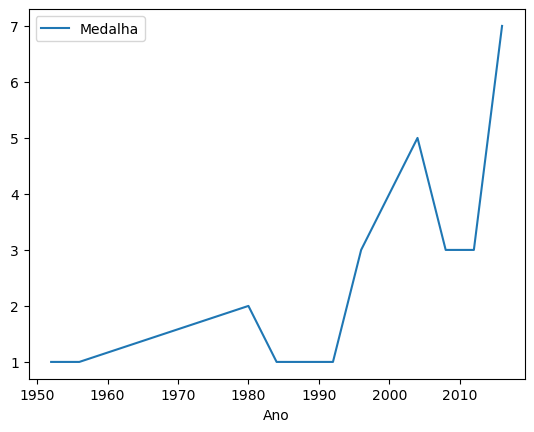

In [304]:
olimPais[(olimPais['Sigla']== 'BRA')&(olimPais['Medalha'] == 'Gold')].groupby(['Ano'])[['Medalha']].count().plot()

In [305]:
resumo = olimPais[(olimPais['Sigla']== 'BRA')&(olimPais['Medalha'] == 'Gold')].groupby(['Ano'])[['Medalha']].count()

<AxesSubplot:xlabel='Ano'>

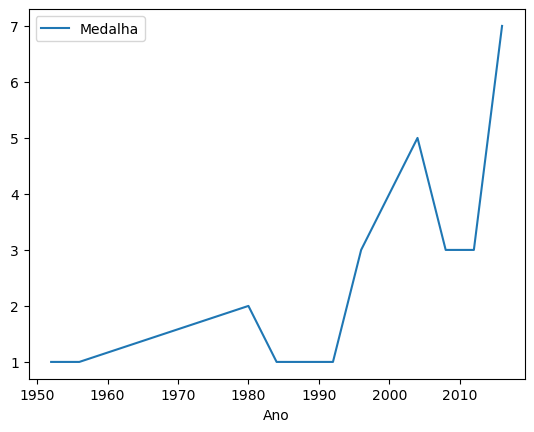

In [306]:
resumo.plot()

<AxesSubplot:xlabel='Ano'>

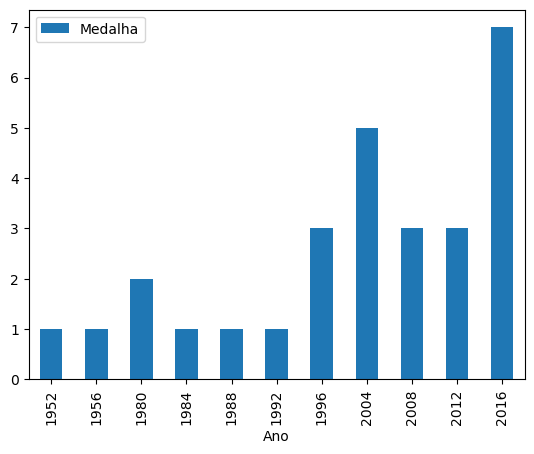

In [307]:
resumo.plot(kind='bar')

<AxesSubplot:ylabel='Ano'>

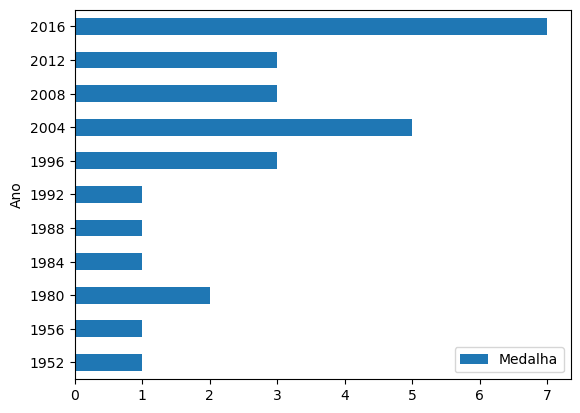

In [308]:
resumo.plot(kind='barh')

<AxesSubplot:xlabel='Ano'>

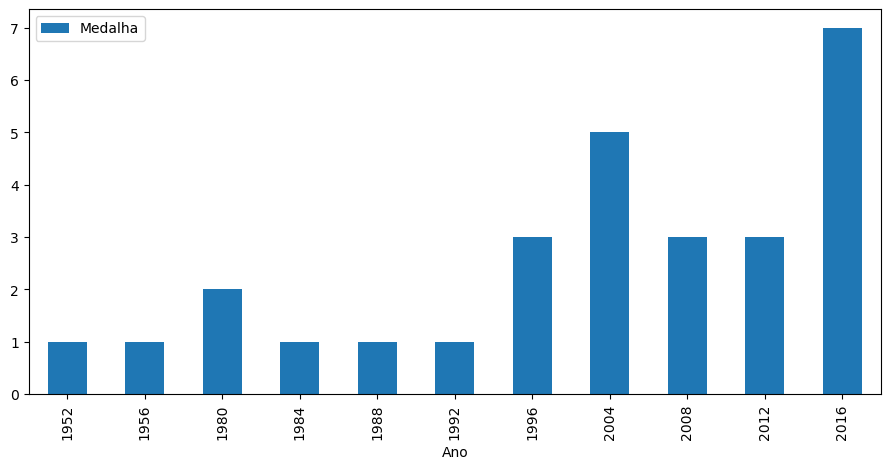

In [309]:
resumo.plot(kind='bar', figsize=(11,5))

<AxesSubplot:xlabel='Ano'>

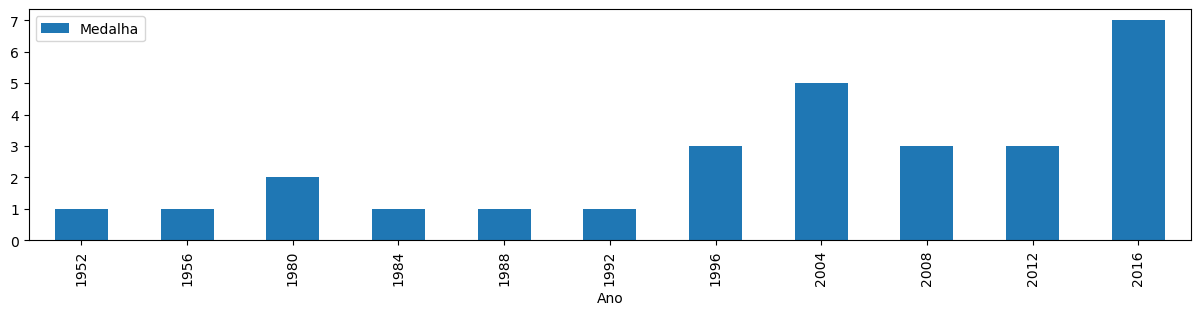

In [310]:
resumo.plot(kind='bar', figsize=(15,3))

<AxesSubplot:xlabel='Ano'>

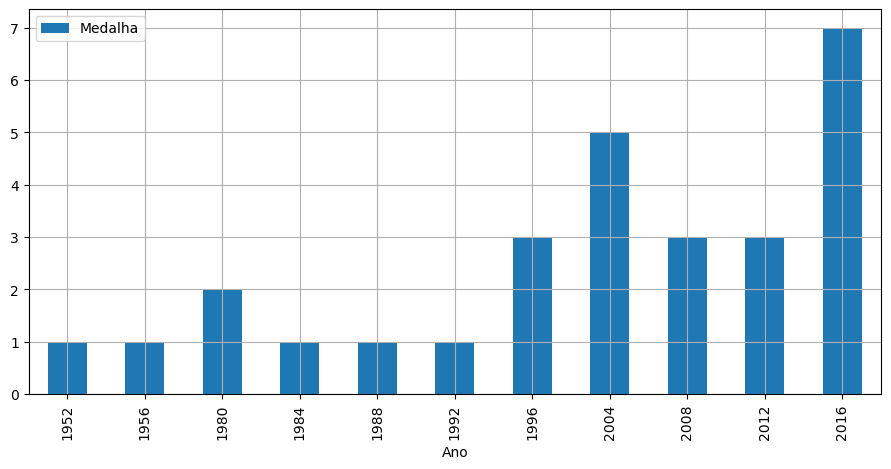

In [311]:
resumo.plot(kind='bar', figsize=(11,5), grid=True)

<AxesSubplot:xlabel='Ano'>

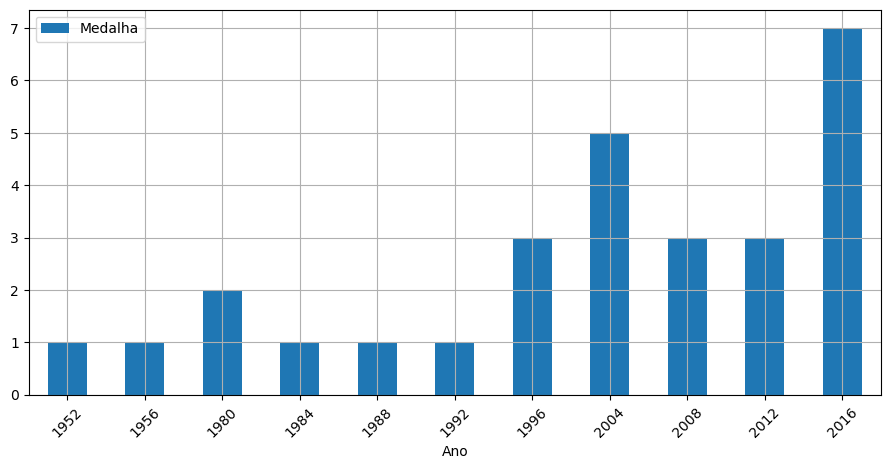

In [312]:
resumo.plot(kind='bar', figsize=(11,5), grid=True, rot=45)

<AxesSubplot:xlabel='Ano'>

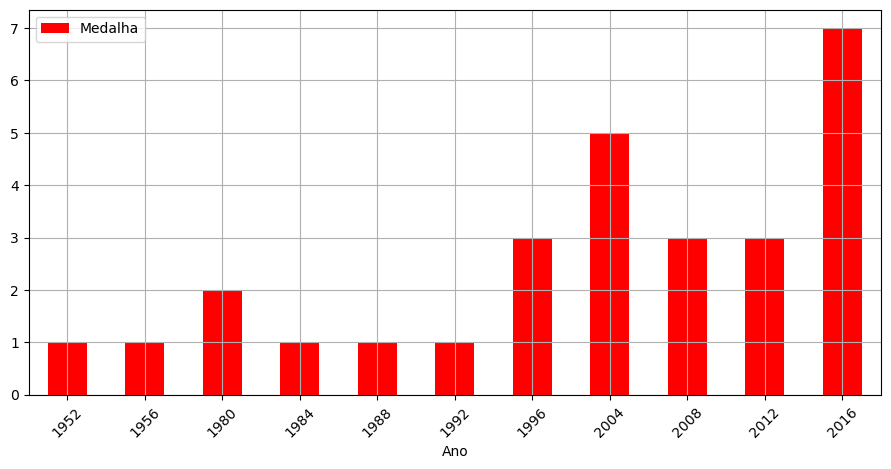

In [313]:
resumo.plot(kind='bar', figsize=(11,5), grid=True, rot=45, color='red')

<AxesSubplot:title={'center':'Categorias por ano'}, xlabel='Ano'>

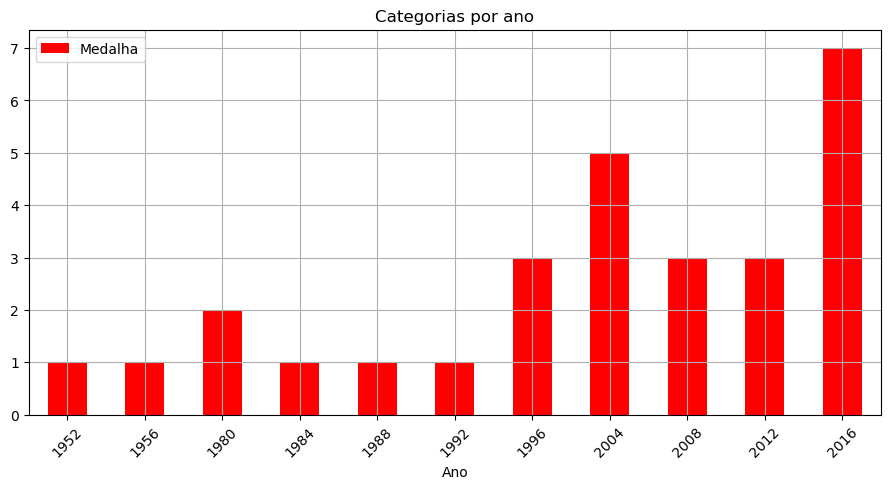

In [314]:
resumo.plot(kind='bar', figsize=(11,5), grid=True, rot=45, color='red', title='Categorias por ano')

In [315]:
resumo.sort_values(by = 'Medalha')

,Medalha
Ano,
1952,1
1956,1
1984,1
1988,1
1992,1
1980,2
1996,3
2008,3
2012,3


In [316]:
resumo.sort_values(by = 'Medalha',ascending=False)

,Medalha
Ano,
2016,7
2004,5
1996,3
2008,3
2012,3
1980,2
1952,1
1956,1
1984,1


<AxesSubplot:title={'center':'Categorias por ano'}, xlabel='Ano'>

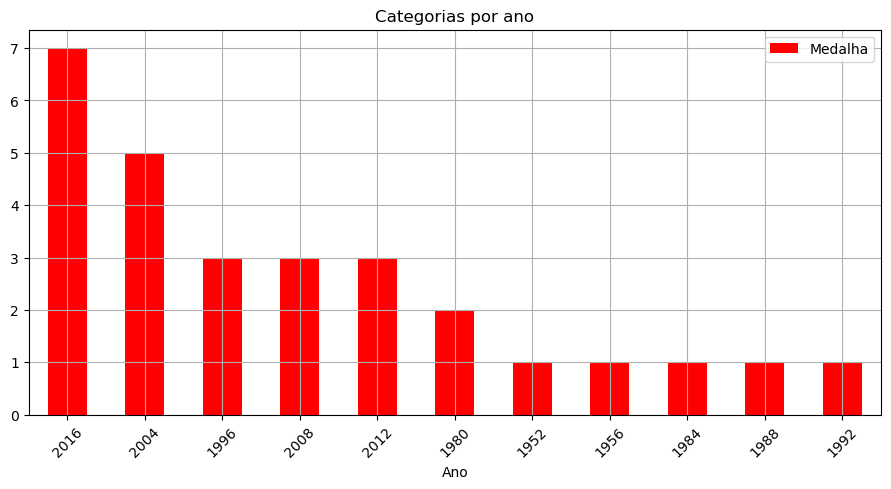

In [317]:
resumo.sort_values(by = 'Medalha',ascending=False).plot(kind='bar', figsize=(11,5), grid=True, rot=45, color='red', title='Categorias por ano')

In [318]:
olimPais[(olimPais['Sigla']== 'BRA')&(olimPais['Medalha'] == 'Gold')].groupby(['Ano'])[['Medalha']].count()

,Medalha
Ano,
1952,1
1956,1
1980,2
1984,1
1988,1
1992,1
1996,3
2004,5
2008,3


In [319]:
olimPais[(olimPais['Sigla']== 'BRA')].groupby(['Ano','Medalha'])[['Medalha']].count()

Medalha
Ano  Medalha         
1948 Bronze         1
1952 Bronze         1
     Gold           1
1956 Gold           1
1960 Bronze         1
1964 Bronze         1
1968 Bronze         2
     Silver         1
1972 Bronze         2
1976 Bronze         2
1980 Bronze         2
     Gold           2
1984 Bronze         2
     Gold           1
     Silver         5
1988 Bronze         3
     Gold           1
     Silver         2
1992 Gold           1
     Silver         1
1996 Bronze         9
     Gold           3
     Silver         3
2000 Bronze         6
     Silver         6
2004 Bronze         3
     Gold           5
     Silver         2
2008 Bronze         9
     Gold           3
     Silver         4
2012 Bronze         9
     Gold           3
     Silver         5
2016 Bronze         6
     Gold           7
     Silver         6

In [320]:
olimPais[(olimPais['Sigla']== 'BRA')].groupby(['Medalha'])[['Medalha']].count()

,Medalha
Medalha,
Bronze,59
Gold,28
Silver,35


In [321]:
resumoP = olimPais[(olimPais['Sigla']== 'BRA')].groupby(['Medalha'])[['Medalha']].count()

In [322]:
resumoP.head()

,Medalha
Medalha,
Bronze,59
Gold,28
Silver,35


array([<AxesSubplot:ylabel='Medalha'>], dtype=object)

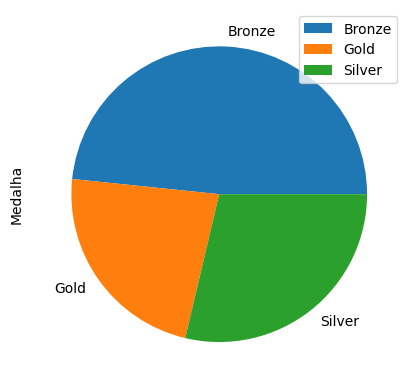

In [323]:
resumoP.plot(kind='pie', subplots=True)

array([<AxesSubplot:ylabel='Medalha'>], dtype=object)

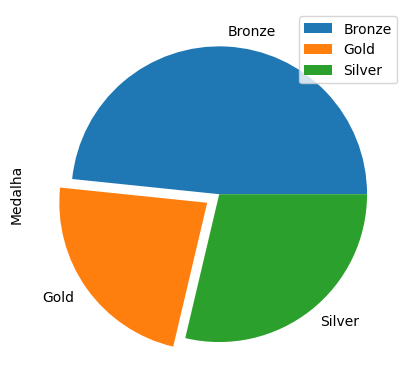

In [324]:
resumoP.plot(kind='pie', subplots=True, explode=(0,0.1,0))

array([<AxesSubplot:ylabel='Medalha'>], dtype=object)

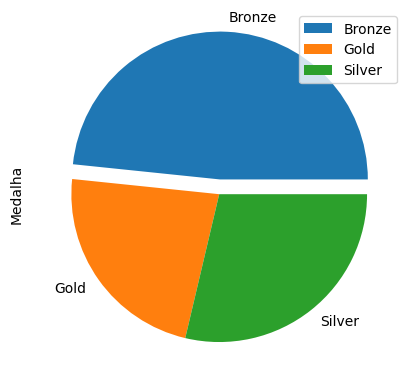

In [325]:
    resumoP.plot(kind='pie', subplots=True, explode=(0.1,0,0))

In [326]:
olim.groupby(['Sigla'])['Altura'].max()

Sigla
AFG    186.0
AHO    193.0
ALB    195.0
ALG    200.0
AND    189.0
       ...  
YEM    185.0
YMD    175.0
YUG    217.0
ZAM    190.0
ZIM    205.0
Name: Altura, Length: 226, dtype: float64

In [327]:
olim.groupby(['Pais'])['Altura'].max()

Pais
Afghanistan                186.0
Albania                    195.0
Algeria                    200.0
American Samoa             188.0
Andorra                    189.0
                           ...  
Virgin Islands, British    196.0
Virgin Islands, US         198.0
Yemen                      185.0
Zambia                     190.0
Zimbabwe                   205.0
Name: Altura, Length: 205, dtype: float64

In [328]:
olim[(olim['Sexo'] == 'M') & ( olim['Sigla'] == 'BRA')].groupby(['Pais'])['Altura'].max()

Pais
Brazil    217.0
Name: Altura, dtype: float64

In [329]:
olim[(olim['Sexo'] == 'M') & ( olim['Sigla'] == 'BRA')].groupby(['Ano','Pais'])['Altura'].max()

Ano   Pais  
1924  Brazil    181.0
1932  Brazil    183.0
1936  Brazil    183.0
1948  Brazil    185.0
1952  Brazil    195.0
1956  Brazil    195.0
1960  Brazil    200.0
1964  Brazil    200.0
1968  Brazil    201.0
1972  Brazil    204.0
1976  Brazil    199.0
1980  Brazil    205.0
1984  Brazil    207.0
1988  Brazil    217.0
1992  Brazil    217.0
1994  Brazil    188.0
1996  Brazil    211.0
2000  Brazil    203.0
2002  Brazil    192.0
2004  Brazil    205.0
2006  Brazil    190.0
2008  Brazil    205.0
2010  Brazil    184.0
2012  Brazil    212.0
2014  Brazil    190.0
2016  Brazil    211.0
Name: Altura, dtype: float64

<AxesSubplot:xlabel='Ano,Pais'>

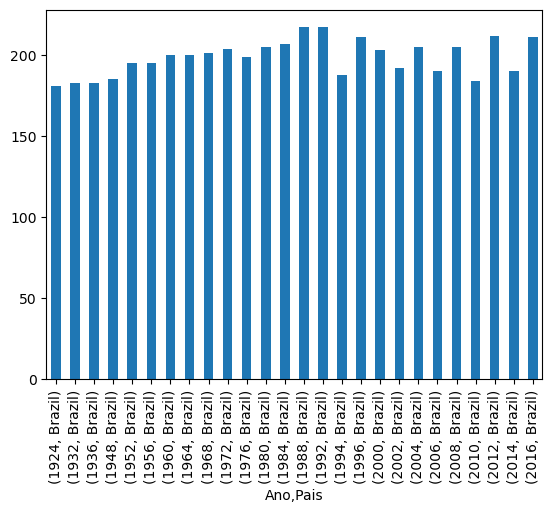

In [330]:
olim[(olim['Sexo'] == 'M') & ( olim['Sigla'] == 'BRA')].groupby(['Ano','Pais'])['Altura'].max().plot(kind='bar')

In [331]:
altura = olim[(olim['Sexo'] == 'M') & ( olim['Sigla'] == 'BRA')].groupby(['Ano','Pais'])['Altura'].max()

<AxesSubplot:xlabel='Ano,Pais'>

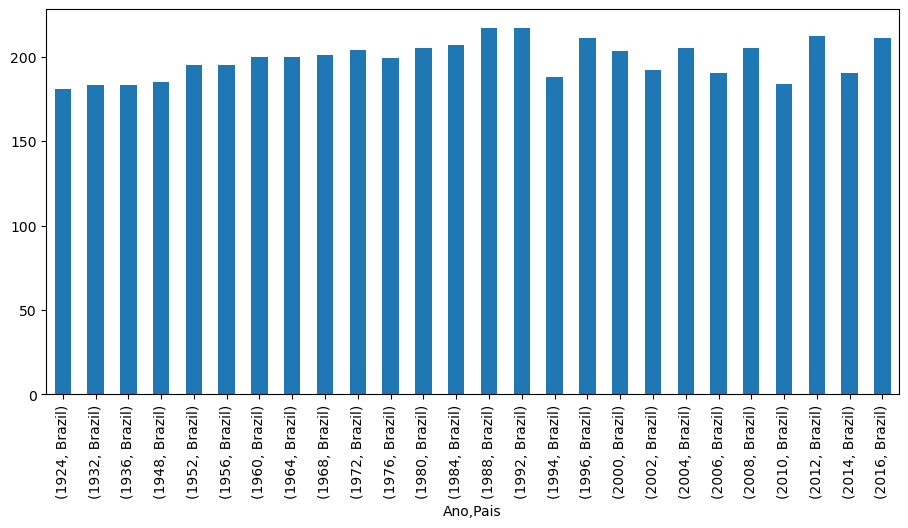

In [332]:
altura.plot(kind='bar',figsize=(11,5))

In [333]:
olim[(olim['Sexo'] == 'M') & ( olim['Sigla'] == 'BRA')].groupby(['Ano','Pais'])['Altura'].mean()

Ano   Pais  
1924  Brazil    181.000000
1932  Brazil    179.000000
1936  Brazil    178.250000
1948  Brazil    182.666667
1952  Brazil    180.214286
1956  Brazil    181.352941
1960  Brazil    179.904762
1964  Brazil    184.966667
1968  Brazil    180.541176
1972  Brazil    181.206186
1976  Brazil    178.922078
1980  Brazil    180.713178
1984  Brazil    181.012739
1988  Brazil    182.194444
1992  Brazil    184.304965
1994  Brazil    188.000000
1996  Brazil    184.066667
2000  Brazil    182.646617
2002  Brazil    181.875000
2004  Brazil    182.481013
2006  Brazil    183.888889
2008  Brazil    182.552326
2010  Brazil    180.000000
2012  Brazil    183.556250
2014  Brazil    182.428571
2016  Brazil    181.509317
Name: Altura, dtype: float64

<AxesSubplot:xlabel='Ano,Pais'>

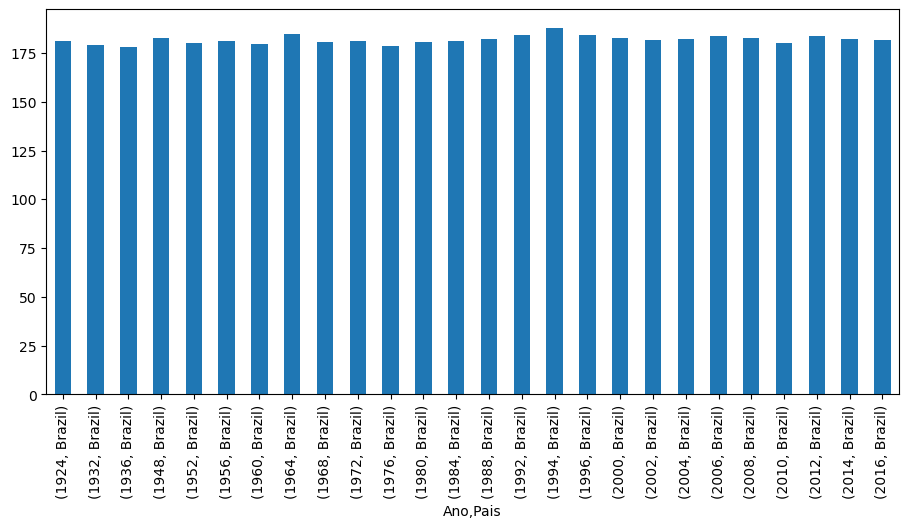

In [334]:
olim[(olim['Sexo'] == 'M') & ( olim['Sigla'] == 'BRA')].groupby(['Ano','Pais'])['Altura'].mean().plot(kind='bar',figsize=(11,5))

C:\Users\joaom\AppData\Local\Temp\ipykernel_22168\2946065058.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  olim[(olim['Sexo'] == 'M') & ( olim['Sigla'] == 'BRA')].groupby(['Ano','Pais'])['Altura','Peso'].mean().plot(figsize=(11,5))


<AxesSubplot:xlabel='Ano,Pais'>

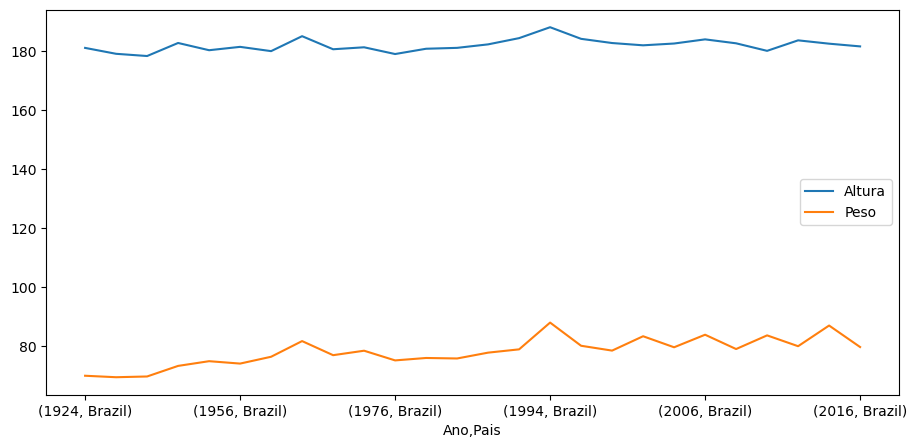

In [335]:
olim[(olim['Sexo'] == 'M') & ( olim['Sigla'] == 'BRA')].groupby(['Ano','Pais'])['Altura','Peso'].mean().plot(figsize=(11,5))

<AxesSubplot:xlabel='Ano', ylabel='Altura'>

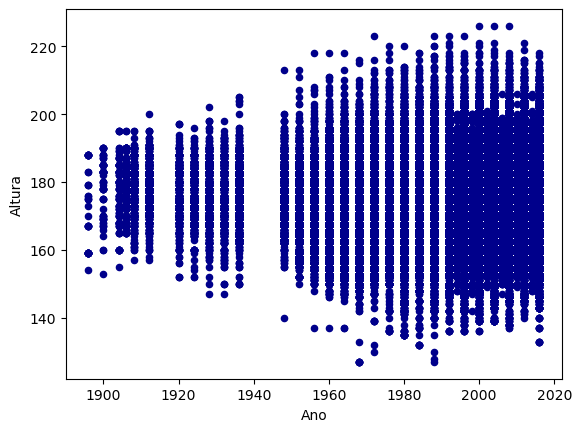

In [336]:
olim.plot.scatter(x='Ano',y='Altura', c='DarkBlue')

<AxesSubplot:xlabel='Ano', ylabel='Altura'>

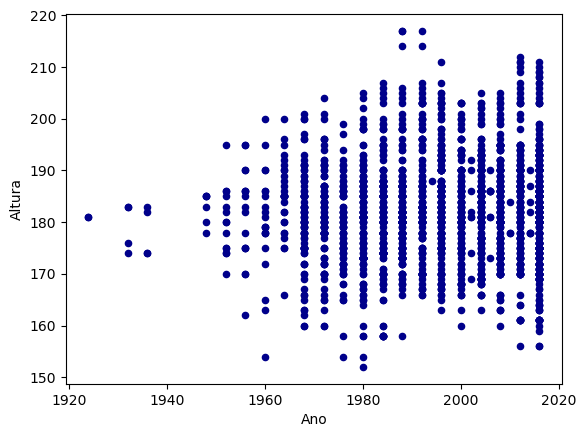

In [337]:
olim[(olim['Sexo'] == 'M') & (olim['Sigla'] == 'BRA')].plot.scatter(x='Ano',y='Altura', c='DarkBlue')

<AxesSubplot:xlabel='Ano', ylabel='Altura'>

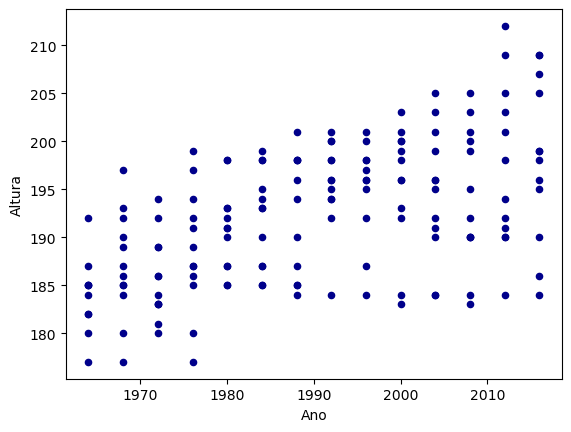

In [338]:
olim[(olim['Sexo'] == 'M') & (olim['Sigla'] == 'BRA') & (olim['Esporte'] == 'Volleyball')].plot.scatter(x='Ano',y='Altura', c='DarkBlue')

<AxesSubplot:xlabel='Peso', ylabel='Altura'>

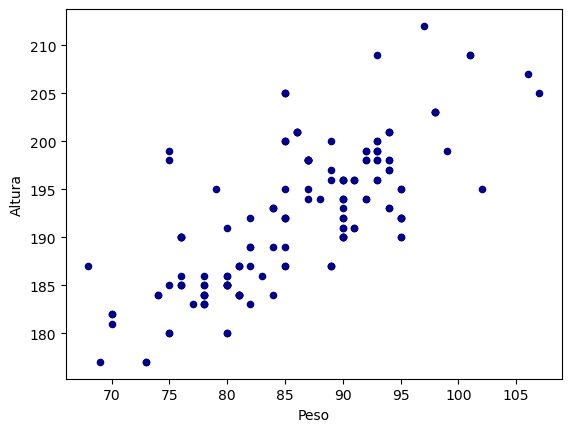

In [339]:
olim[(olim['Sexo'] == 'M') & (olim['Sigla'] == 'BRA') & (olim['Esporte'] == 'Volleyball')].plot.scatter(x='Peso',y='Altura', c='DarkBlue')

<AxesSubplot:xlabel='Idade', ylabel='Altura'>

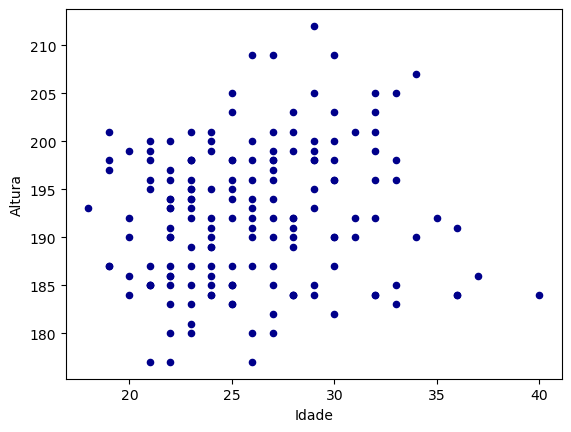

In [340]:
olim[(olim['Sexo'] == 'M') & (olim['Sigla'] == 'BRA') & (olim['Esporte'] == 'Volleyball')].plot.scatter(x='Idade',y='Altura', c='DarkBlue')

<AxesSubplot:xlabel='Peso', ylabel='Altura'>

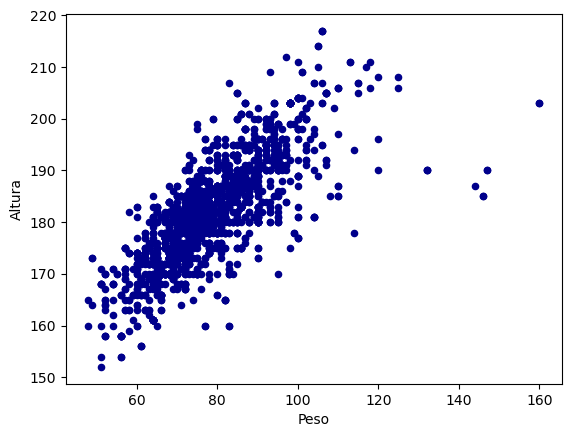

In [341]:
olim[(olim['Sexo'] == 'M') & (olim['Sigla'] == 'BRA')].plot.scatter(x='Peso',y='Altura', c='DarkBlue')

<AxesSubplot:xlabel='Peso', ylabel='Altura'>

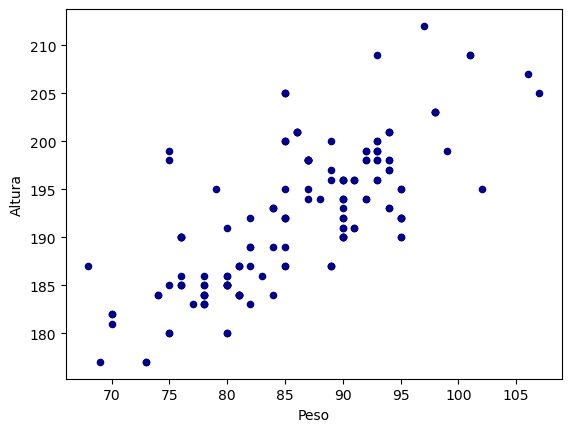

In [342]:
olim[(olim['Sexo'] == 'M') & (olim['Sigla'] == 'BRA') & (olim['Esporte'] == 'Volleyball')].plot.scatter(x='Peso',y='Altura', c='DarkBlue')

In [343]:
olim['Esporte'].unique()

array(['Basketball', 'Judo', 'Speed Skating', 'Cross Country Skiing',
       'Ice Hockey', 'Badminton', 'Sailing', 'Biathlon', 'Gymnastics',
       'Athletics', 'Alpine Skiing', 'Weightlifting', 'Wrestling', 'Luge',
       'Rowing', 'Bobsleigh', 'Swimming', 'Football', 'Equestrianism',
       'Shooting', 'Taekwondo', 'Boxing', 'Fencing', 'Diving', 'Canoeing',
       'Handball', 'Water Polo', 'Tennis', 'Cycling', 'Hockey',
       'Figure Skating', 'Softball', 'Archery', 'Volleyball',
       'Synchronized Swimming', 'Modern Pentathlon', 'Table Tennis',
       'Nordic Combined', 'Baseball', 'Rhythmic Gymnastics',
       'Freestyle Skiing', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Ski Jumping', 'Curling', 'Golf',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton', 'Rugby',
       'Tug-Of-War', 'Art Competitions', 'Lacrosse', 'Motorboating'],
      dtype=object)

<AxesSubplot:xlabel='Peso', ylabel='Altura'>

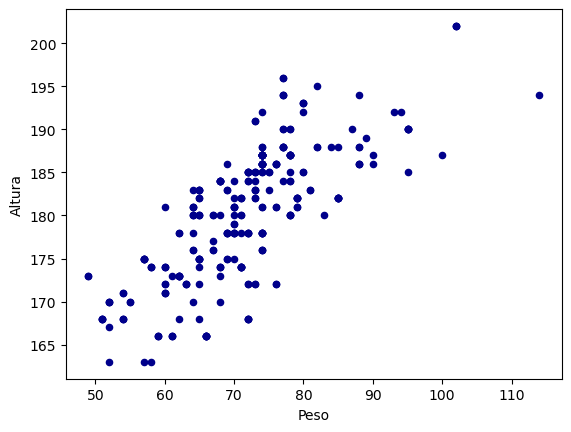

In [344]:
olim[(olim['Sexo'] == 'M') & (olim['Sigla'] == 'BRA') & (olim['Esporte'] == 'Athletics')].plot.scatter(x='Peso',y='Altura', c='DarkBlue')

<AxesSubplot:xlabel='Peso', ylabel='Altura'>

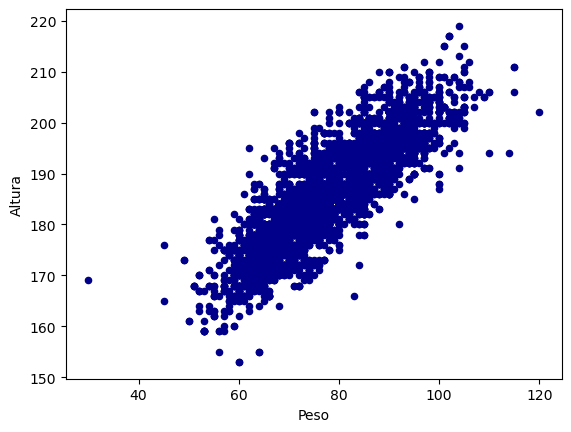

In [345]:
olim[(olim['Sexo'] == 'M') & (olim['Sigla'] == 'BRA') & (olim['Esporte'] == 'Athletics') | (olim['Esporte'] == 'Volleyball') ].plot.scatter(x='Peso',y='Altura', c='DarkBlue')

In [346]:
colorido = olim[(olim['Sexo'] == 'M') & (olim['Sigla'] == 'BRA') & ((olim['Esporte'] == 'Athletics') | (olim['Esporte'] == 'Volleyball'))]

In [347]:
colorido.head()

,ID,Nome,Sexo,Idade,Altura,Peso,Time,Sigla,Jogo,Ano,Temporada,Cidade,Esporte,Evento,Medalha,Pais,Obs
665,386,Alexandre Abeid,M,22.0,194.0,92.0,Brazil,BRA,1972 Summer,1972,Summer,Munich,Volleyball,Volleyball Men's Volleyball,NaN,Brazil,NaN
666,386,Alexandre Abeid,M,26.0,194.0,92.0,Brazil,BRA,1976 Summer,1976,Summer,Montreal,Volleyball,Volleyball Men's Volleyball,NaN,Brazil,NaN
5714,3221,Higor Silva Alves,M,22.0,183.0,64.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's Long Jump,NaN,Brazil,NaN
5720,3227,Thiago Soares Alves,M,25.0,194.0,88.0,Brazil,BRA,2012 Summer,2012,Summer,London,Volleyball,Volleyball Men's Volleyball,Silver,Brazil,NaN
5927,3330,Amauri Ribeiro,M,21.0,198.0,87.0,Brazil,BRA,1980 Summer,1980,Summer,Moskva,Volleyball,Volleyball Men's Volleyball,NaN,Brazil,NaN


In [348]:
colorido = olim[(olim['Sexo'] == 'M') & (olim['Sigla'] == 'BRA') & ((olim['Esporte'] == 'Athletics') | (olim['Esporte'] == 'Volleyball'))]

In [349]:
colorido.head(50)

,ID,Nome,Sexo,Idade,Altura,Peso,Time,Sigla,Jogo,Ano,Temporada,Cidade,Esporte,Evento,Medalha,Pais,Obs
665,386,Alexandre Abeid,M,22.0,194.0,92.0,Brazil,BRA,1972 Summer,1972,Summer,Munich,Volleyball,Volleyball Men's Volleyball,NaN,Brazil,NaN
666,386,Alexandre Abeid,M,26.0,194.0,92.0,Brazil,BRA,1976 Summer,1976,Summer,Montreal,Volleyball,Volleyball Men's Volleyball,NaN,Brazil,NaN
5714,3221,Higor Silva Alves,M,22.0,183.0,64.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's Long Jump,NaN,Brazil,NaN
5720,3227,Thiago Soares Alves,M,25.0,194.0,88.0,Brazil,BRA,2012 Summer,2012,Summer,London,Volleyball,Volleyball Men's Volleyball,Silver,Brazil,NaN
5927,3330,Amauri Ribeiro,M,21.0,198.0,87.0,Brazil,BRA,1980 Summer,1980,Summer,Moskva,Volleyball,Volleyball Men's Volleyball,NaN,Brazil,NaN
5928,3330,Amauri Ribeiro,M,25.0,198.0,87.0,Brazil,BRA,1984 Summer,1984,Summer,Los Angeles,Volleyball,Volleyball Men's Volleyball,Silver,Brazil,NaN
5929,3330,Amauri Ribeiro,M,29.0,198.0,87.0,Brazil,BRA,1988 Summer,1988,Summer,Seoul,Volleyball,Volleyball Men's Volleyball,NaN,Brazil,NaN
5930,3330,Amauri Ribeiro,M,33.0,198.0,87.0,Brazil,BRA,1992 Summer,1992,Summer,Barcelona,Volleyball,Volleyball Men's Volleyball,Gold,Brazil,NaN
6760,3790,Anderson de Oliveira Rodrigues,M,30.0,190.0,95.0,Brazil,BRA,2004 Summer,2004,Summer,Athina,Volleyball,Volleyball Men's Volleyball,Gold,Brazil,NaN
6761,3790,Anderson de Oliveira Rodrigues,M,34.0,190.0,95.0,Brazil,BRA,2008 Summer,2008,Summer,Beijing,Volleyball,Volleyball Men's Volleyball,Silver,Brazil,NaN


<AxesSubplot:xlabel='Peso', ylabel='Altura'>

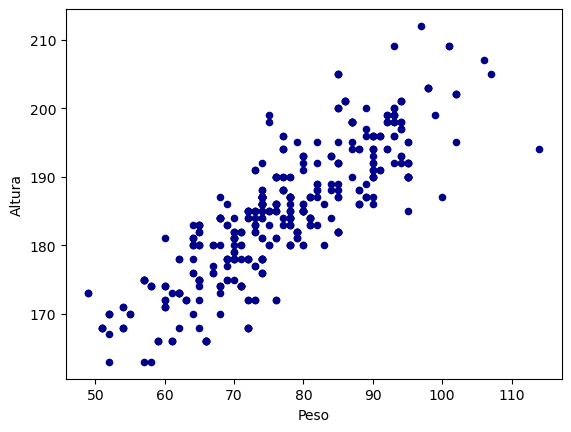

In [350]:
colorido.plot.scatter(x='Peso',y='Altura',c='DarkBlue')

<AxesSubplot:xlabel='Peso', ylabel='Altura'>

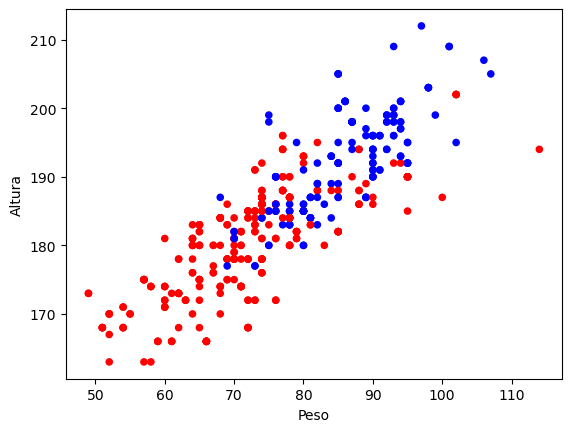

In [351]:
colormap = {'Volleyball':'blue','Athletics':'red'}
cores = [colormap[x] for x in colorido['Esporte']]
colorido.plot.scatter(x='Peso', y='Altura', color=cores)

In [352]:
colorido = olim[(olim['Sexo'] == 'M') & (olim['Sigla'] == 'BRA') & ((olim['Esporte'] == 'Athletics') | (olim['Esporte'] == 'Volleyball') | (olim['Esporte'] == 'Tennis'))]

In [353]:
colorido.head()

,ID,Nome,Sexo,Idade,Altura,Peso,Time,Sigla,Jogo,Ano,Temporada,Cidade,Esporte,Evento,Medalha,Pais,Obs
665,386,Alexandre Abeid,M,22.0,194.0,92.0,Brazil,BRA,1972 Summer,1972,Summer,Munich,Volleyball,Volleyball Men's Volleyball,NaN,Brazil,NaN
666,386,Alexandre Abeid,M,26.0,194.0,92.0,Brazil,BRA,1976 Summer,1976,Summer,Montreal,Volleyball,Volleyball Men's Volleyball,NaN,Brazil,NaN
1235,695,Ricardo Augusto Amaral Acioly,M,24.0,179.0,78.0,Brazil,BRA,1988 Summer,1988,Summer,Seoul,Tennis,Tennis Men's Doubles,NaN,Brazil,NaN
5714,3221,Higor Silva Alves,M,22.0,183.0,64.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's Long Jump,NaN,Brazil,NaN
5720,3227,Thiago Soares Alves,M,25.0,194.0,88.0,Brazil,BRA,2012 Summer,2012,Summer,London,Volleyball,Volleyball Men's Volleyball,Silver,Brazil,NaN


<AxesSubplot:xlabel='Peso', ylabel='Altura'>

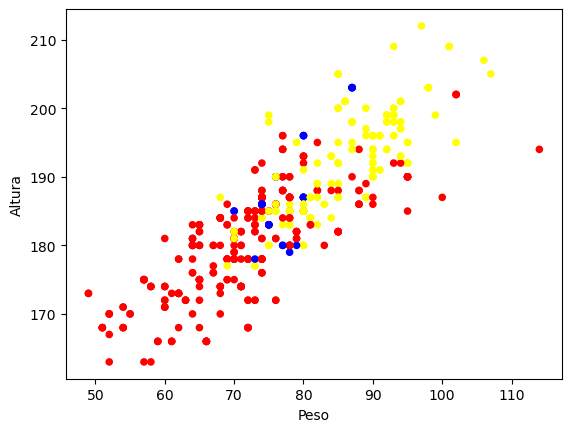

In [354]:
colormap = {'Volleyball':'Yellow','Athletics':'red','Tennis':'blue'}
cores = [colormap[x] for x in colorido['Esporte']]
colorido.plot.scatter(x='Peso', y='Altura', color=cores)

<AxesSubplot:xlabel='Peso', ylabel='Altura'>

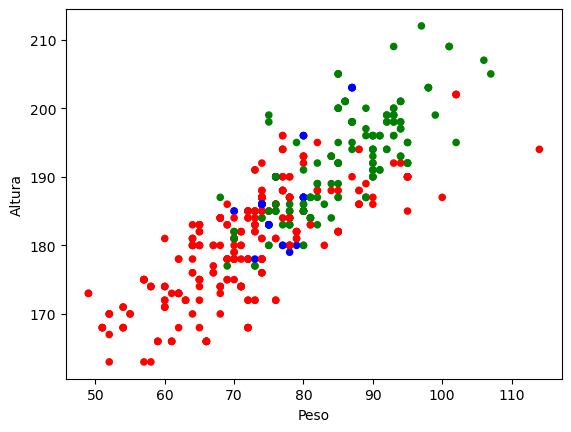

In [355]:
colormap = {'Volleyball':'Green','Athletics':'red','Tennis':'blue'}
cores = [colormap[x] for x in colorido['Esporte']]
colorido.plot.scatter(x='Peso', y='Altura', color=cores)

<AxesSubplot:xlabel='Esporte', ylabel='Altura'>

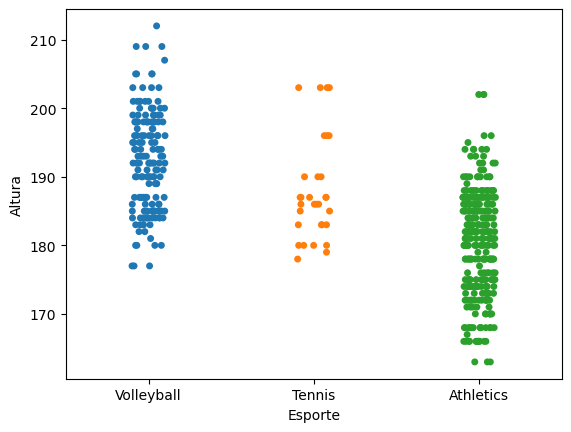

In [356]:
sns.stripplot(data=colorido, x='Esporte',y='Altura')

<AxesSubplot:xlabel='Esporte', ylabel='Altura'>

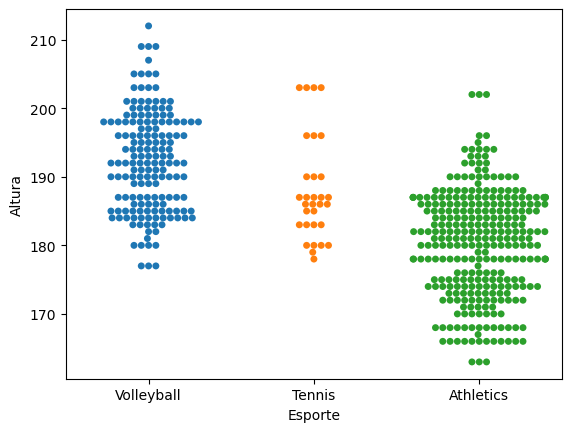

In [357]:
sns.swarmplot(data=colorido, x='Esporte',y='Altura')

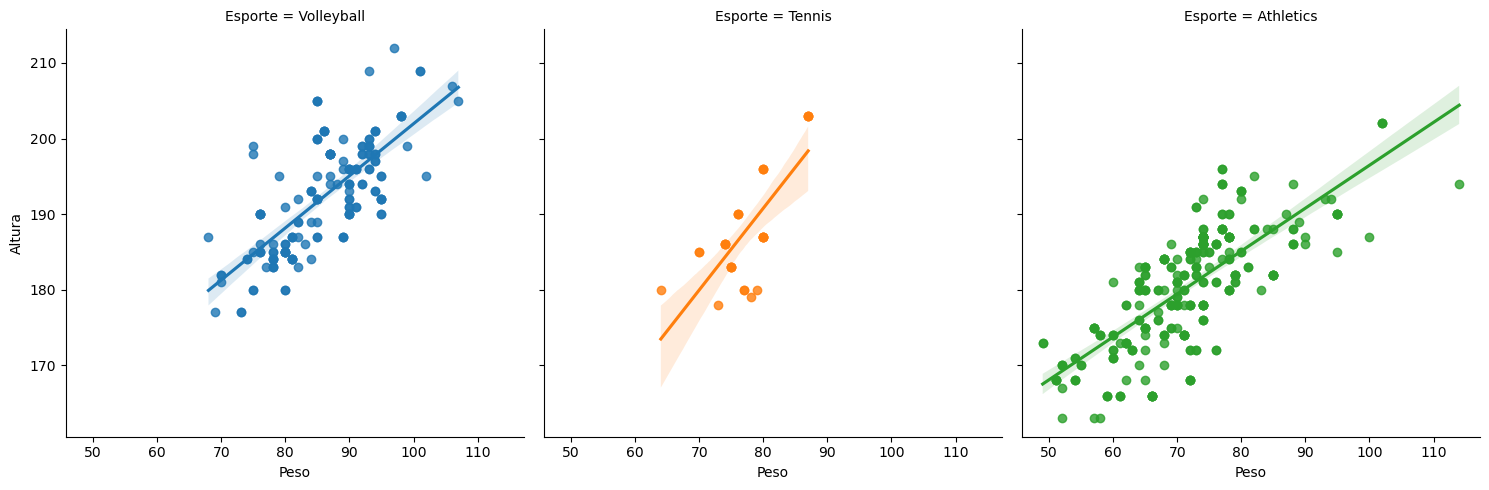

In [358]:
sns.lmplot(data=colorido, x='Peso', y='Altura', hue='Esporte', col='Esporte')

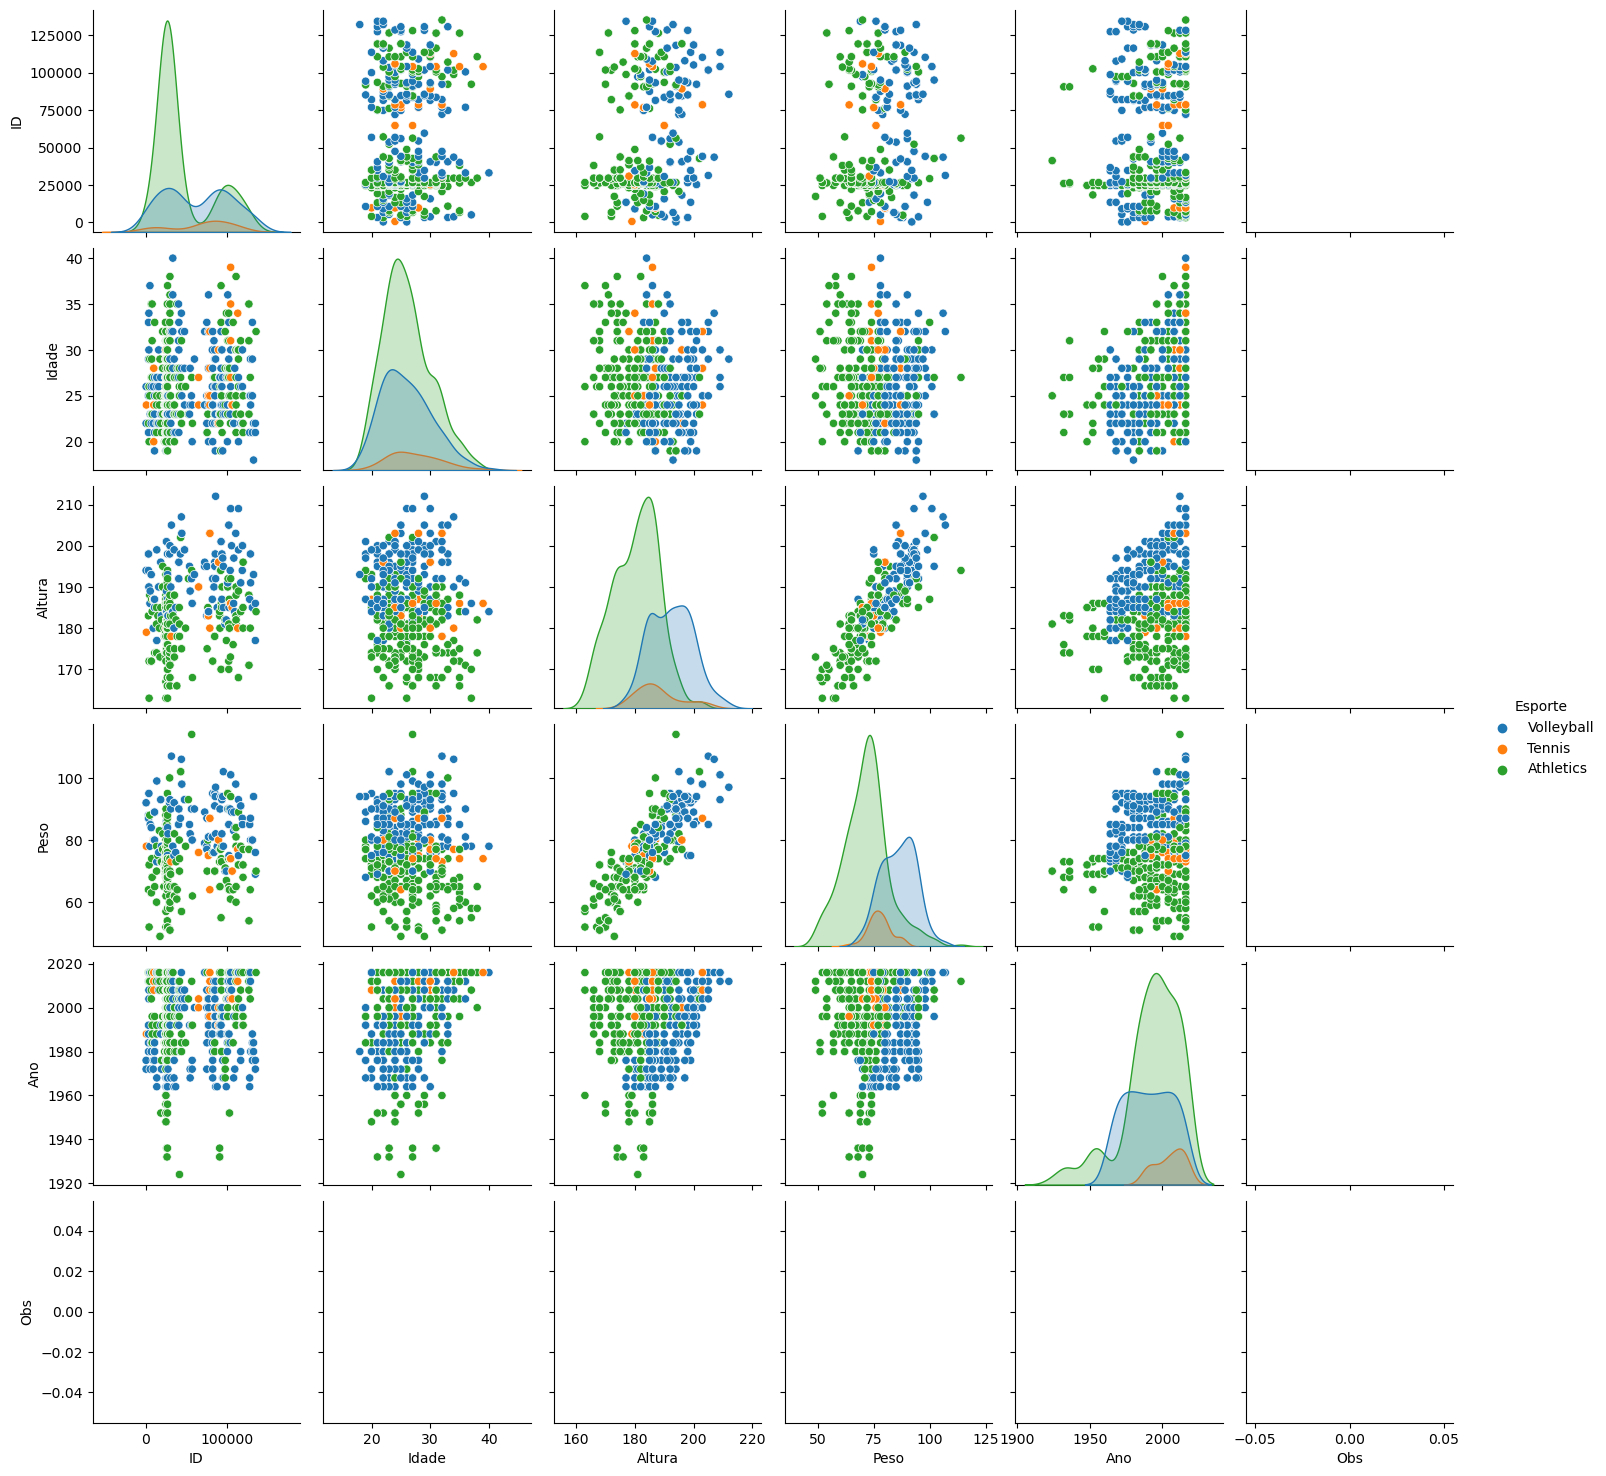

In [359]:
sns.pairplot(colorido, hue='Esporte')

In [360]:
mapaCalor = pd.pivot_table(colorido,values='Altura', index=['Esporte'], columns='Ano')

<AxesSubplot:xlabel='Ano', ylabel='Esporte'>

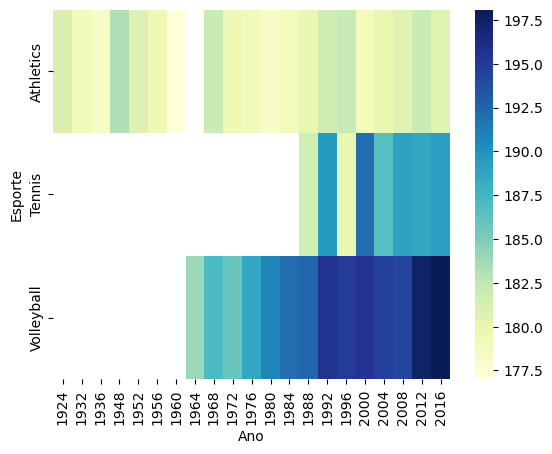

In [361]:
sns.heatmap(mapaCalor, cmap='YlGnBu')

<AxesSubplot:xlabel='Ano', ylabel='Esporte'>

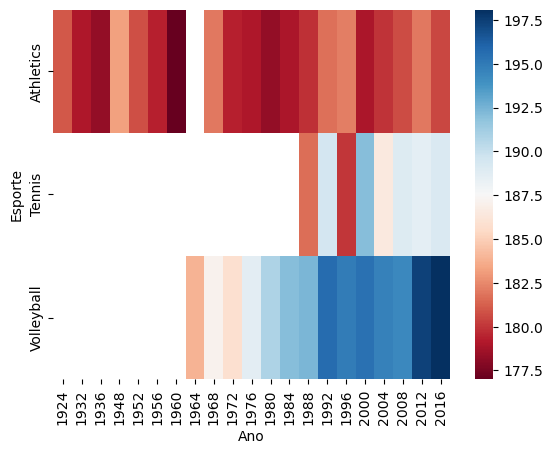

In [362]:
sns.heatmap(mapaCalor, cmap='RdBu')

<AxesSubplot:>

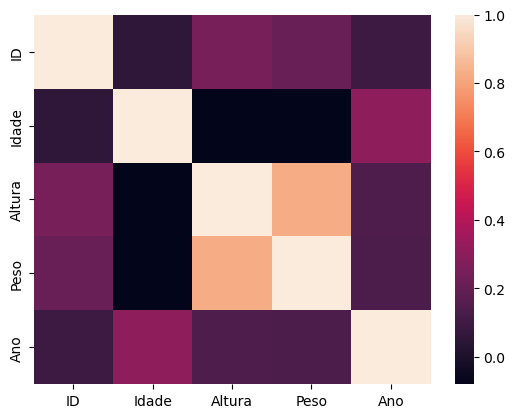

In [363]:
sns.heatmap(colorido.corr())

<AxesSubplot:>

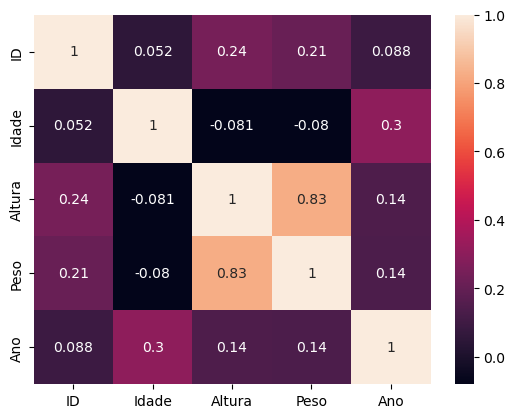

In [364]:
sns.heatmap(colorido.corr(), annot=True)

C:\Users\joaom\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Altura'>

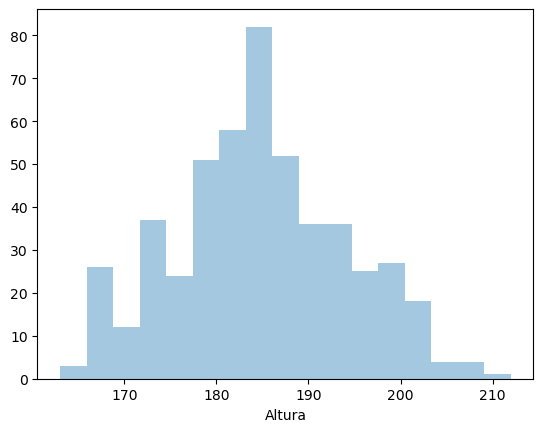

In [365]:
sns.distplot(colorido['Altura'], kde=False)

<AxesSubplot:xlabel='Peso'>

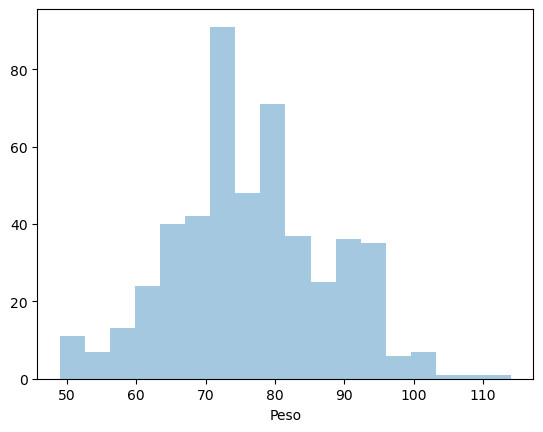

In [366]:
sns.distplot(colorido['Peso'], kde=False)

<AxesSubplot:xlabel='Peso', ylabel='Density'>

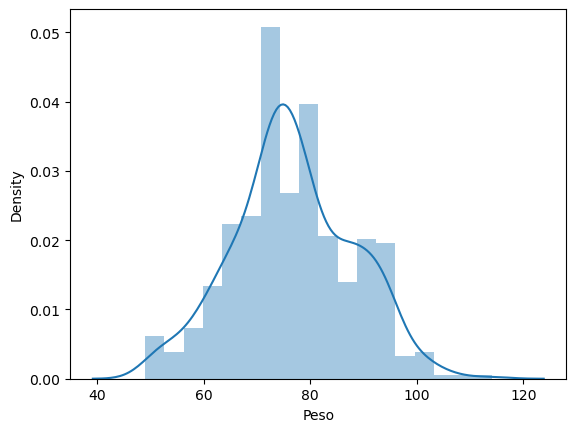

In [367]:
sns.distplot(colorido['Peso'], kde=True)

<AxesSubplot:xlabel='Esporte', ylabel='Altura'>

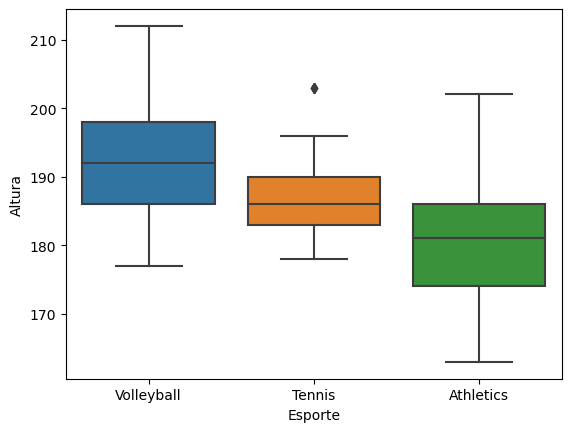

In [368]:
sns.boxplot(data=colorido, x='Esporte', y='Altura')

In [369]:
colorido.head()

,ID,Nome,Sexo,Idade,Altura,Peso,Time,Sigla,Jogo,Ano,Temporada,Cidade,Esporte,Evento,Medalha,Pais,Obs
665,386,Alexandre Abeid,M,22.0,194.0,92.0,Brazil,BRA,1972 Summer,1972,Summer,Munich,Volleyball,Volleyball Men's Volleyball,NaN,Brazil,NaN
666,386,Alexandre Abeid,M,26.0,194.0,92.0,Brazil,BRA,1976 Summer,1976,Summer,Montreal,Volleyball,Volleyball Men's Volleyball,NaN,Brazil,NaN
1235,695,Ricardo Augusto Amaral Acioly,M,24.0,179.0,78.0,Brazil,BRA,1988 Summer,1988,Summer,Seoul,Tennis,Tennis Men's Doubles,NaN,Brazil,NaN
5714,3221,Higor Silva Alves,M,22.0,183.0,64.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's Long Jump,NaN,Brazil,NaN
5720,3227,Thiago Soares Alves,M,25.0,194.0,88.0,Brazil,BRA,2012 Summer,2012,Summer,London,Volleyball,Volleyball Men's Volleyball,Silver,Brazil,NaN


In [370]:
colorido.columns

Index(['ID', 'Nome', 'Sexo', 'Idade', 'Altura', 'Peso', 'Time', 'Sigla',
       'Jogo', 'Ano', 'Temporada', 'Cidade', 'Esporte', 'Evento', 'Medalha',
       'Pais', 'Obs'],
      dtype='object')

In [371]:
ml = colorido.drop(columns=['ID', 'Nome', 'Sexo','Time', 'Sigla',
       'Jogo', 'Ano', 'Temporada', 'Cidade','Evento', 'Medalha',
       'Pais', 'Obs'])

In [372]:
ml.head()

,Idade,Altura,Peso,Esporte
665,22.0,194.0,92.0,Volleyball
666,26.0,194.0,92.0,Volleyball
1235,24.0,179.0,78.0,Tennis
5714,22.0,183.0,64.0,Athletics
5720,25.0,194.0,88.0,Volleyball


<h3>Classificação dos esportes: </h3>
<hr>
Volei     = 0
<br>
Tenis     = 1
<br>
Atletismo = 2

In [373]:
ml.head()

,Idade,Altura,Peso,Esporte
665,22.0,194.0,92.0,Volleyball
666,26.0,194.0,92.0,Volleyball
1235,24.0,179.0,78.0,Tennis
5714,22.0,183.0,64.0,Athletics
5720,25.0,194.0,88.0,Volleyball


In [375]:
ml['Classificacao'] = 9.9

In [376]:
ml.head()

,Idade,Altura,Peso,Esporte,Classificacao
665,22.0,194.0,92.0,Volleyball,9.9
666,26.0,194.0,92.0,Volleyball,9.9
1235,24.0,179.0,78.0,Tennis,9.9
5714,22.0,183.0,64.0,Athletics,9.9
5720,25.0,194.0,88.0,Volleyball,9.9


In [377]:
ml['Esporte'].unique()

array(['Volleyball', 'Tennis', 'Athletics'], dtype=object)

In [378]:
for index, row in ml.iterrows():
    if row['Esporte'] == 'Volleyball':
        ml.loc[index,'Classificacao'] = 0.0
    elif row['Esporte'] == 'Tennis':
        ml.loc[index,'Classificacao'] = 1.0
    else:
        ml.loc[index,'Classificacao'] = 2.0

In [379]:
ml.head()

,Idade,Altura,Peso,Esporte,Classificacao
665,22.0,194.0,92.0,Volleyball,0.0
666,26.0,194.0,92.0,Volleyball,0.0
1235,24.0,179.0,78.0,Tennis,1.0
5714,22.0,183.0,64.0,Athletics,2.0
5720,25.0,194.0,88.0,Volleyball,0.0


In [380]:
ml.isnull().any()

Idade            False
Altura           False
Peso             False
Esporte          False
Classificacao    False
dtype: bool

In [381]:
carac = list(ml.columns[:3])

In [382]:
carac

['Idade', 'Altura', 'Peso']

In [383]:
 y = ml['Classificacao']

In [384]:
X = ml[carac]

<h3>Treinamento<h3>
70% do conjunto de dados para treino e 30% para teste

In [385]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3,random_state=1)

In [386]:
ad = DecisionTreeClassifier()

In [387]:
ad = ad.fit(X_treino, y_treino)

In [388]:
y_pred = ad.predict(X_teste)

In [390]:
print('Precisão:', metrics.accuracy_score(y_teste,y_pred))

Precisão: 0.7986577181208053


In [391]:
carac

['Idade', 'Altura', 'Peso']

In [394]:
ad.predict([[38,180,75]])

C:\Users\joaom\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1.])

In [395]:
ad.predict([[38,200,75]])

C:\Users\joaom\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0.])

In [396]:
ad.predict([[38,160,55]])

C:\Users\joaom\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([2.])

In [397]:
ml.to_excel(r'C:\Users\joaom\OneDrive\Documentos\Curso\Curso de Data Science\material de apoio\ML-120-anos.xlsx')